In [ ]:
!pip install flask

In [79]:
!pip install blinker

Defaulting to user installation because normal site-packages is not writeable


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
!pip install flask_ngrok pyngrok sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


In [89]:
!pip install flask flask-ngrok pyngrok

Defaulting to user installation because normal site-packages is not writeable


In [91]:
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request, jsonify

In [93]:
ngrok.set_auth_token("30gZgvl8HbVv2Yped1UGzm0msg5_5BxUAQJskLBzY1opP82D")

In [95]:
from pyngrok import conf
import os

ngrok_config = conf.get_default()
ngrok_bin = ngrok_config.ngrok_path

if os.path.exists(ngrok_bin):
    os.remove(ngrok_bin)
    print(f"Deleted bad ngrok.exe at {ngrok_bin}")


Deleted bad ngrok.exe at C:\Users\Madhu\AppData\Local\ngrok\ngrok.exe


In [10]:
from pyngrok import ngrok

ngrok.set_auth_token("30gZgvl8HbVv2Yped1UGzm0msg5_5BxUAQJskLBzY1opP82D")


**Data Loading**


In [101]:
flights = pd.read_csv(r"C:\VoyageTravelAnalytics\datasets\flights.csv")
users = pd.read_csv(r"C:\VoyageTravelAnalytics\datasets\users.csv")
hotels = pd.read_csv(r"C:\VoyageTravelAnalytics\datasets\hotels.csv")

In [103]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


# Define Minning and Exploration

In [106]:
# Shape of the dataset
df_list = [flights, hotels, users]
df_name_list = ['flights', 'hotels', 'users']

for df_name, df in zip(df_name_list, df_list):
    print(f'Total no. of rows and columns in {df_name}: {df.shape}')

Total no. of rows and columns in flights: (271888, 10)
Total no. of rows and columns in hotels: (40552, 8)
Total no. of rows and columns in users: (1340, 5)


In [108]:
# Dataset Info
for df_name, df in zip(df_name_list, df_list):
    print(f'{df_name} Dataset Info:-')
    print(df.info())

flights Dataset Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB
None
hotels Dataset Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  


In [110]:
# Summary statistics of numeric columns
for df_name, df in zip(df_name_list, df_list):
    print(f'{df_name} Dataset Summary Statistics:-')
    print(df.describe())

flights Dataset Summary Statistics:-
          travelCode       userCode         price           time  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503       1.421147   
std     39243.724665     389.523127     362.31189       0.542541   
min         0.000000       0.000000     301.51000       0.440000   
25%     33985.750000     326.000000     672.66000       1.040000   
50%     67971.500000     659.000000     904.00000       1.460000   
75%    101957.250000    1011.000000    1222.24000       1.760000   
max    135943.000000    1339.000000    1754.17000       2.440000   

            distance  
count  271888.000000  
mean      546.955535  
std       208.851288  
min       168.220000  
25%       401.660000  
50%       562.140000  
75%       676.530000  
max       937.770000  
hotels Dataset Summary Statistics:-
          travelCode      userCode          days         price         total
count   40552.000000  40552.00

In [112]:
# Summary statistics of categorical columns
for i, df in zip(df_name_list, df_list):
    print(f'{i} Dataset Summary Statistics:-')
    print(df.describe(include='object'))


flights Dataset Summary Statistics:-
                      from                  to  flightType   agency  \
count               271888              271888      271888   271888   
unique                   9                   9           3        3   
top     Florianopolis (SC)  Florianopolis (SC)  firstClass  Rainbow   
freq                 57317               57317      116418   116752   

              date  
count       271888  
unique         999  
top     09/26/2019  
freq          1335  
hotels Dataset Summary Statistics:-
           name          place        date
count     40552          40552       40552
unique        9              9         199
top     Hotel K  Salvador (BH)  10/31/2019
freq       5094           5094         404
users Dataset Summary Statistics:-
       company               name gender
count     1340               1340   1340
unique       5               1338      3
top       4You  Charlotte Johnson   male
freq       453                  2    452


In [114]:
# Check for Missing Values
for i, df in zip(df_name_list, df_list):
    print(f'Total no. of null rows in {i}: {df.isnull().sum()}')

Total no. of null rows in flights: travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64
Total no. of null rows in hotels: travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64
Total no. of null rows in users: code       0
company    0
name       0
gender     0
age        0
dtype: int64


In [116]:
# Check for Duplicate rows
for i, df in zip(df_name_list, df_list):
    print(f'Total no. of duplicate rows in {i}: {df.duplicated().sum()}')

Total no. of duplicate rows in flights: 0
Total no. of duplicate rows in hotels: 0
Total no. of duplicate rows in users: 0


# Data Pre-Processing

In [119]:
#flights1= flights.merge(users,how='outer',left_on='userCode',right_on='code')
# Converting date column data type into datetime
flights['date'] = pd.to_datetime(flights['date'])

# Extracting WeekNo., Month, Year, Weekday from date column
flights['week_day'] = flights['date'].dt.weekday
flights['month'] = flights['date'].dt.month
flights['week_no'] = flights['date'].dt.isocalendar().week
flights['year'] = flights['date'].dt.year
flights['day'] = flights['date'].dt.day

In [121]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,week_day,month,week_no,year,day
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,3,9,39,2019,26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,0,9,40,2019,30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,3,10,40,2019,3
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,4,10,40,2019,4
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,3,10,41,2019,10


# Filtering the dataframe based on the relevent column

In [124]:
flights_filtered= flights[['from','to','flightType','agency','time','distance','week_day','week_no','day','month','year','price']]
flights_filtered.head()

,from,to,flightType,agency,time,distance,week_day,week_no,day,month,year,price
0,Recife (PE),Florianopolis (SC),firstClass,FlyingDrops,1.76,676.53,3,39,26,9,2019,1434.38
1,Florianopolis (SC),Recife (PE),firstClass,FlyingDrops,1.76,676.53,0,40,30,9,2019,1292.29
2,Brasilia (DF),Florianopolis (SC),firstClass,CloudFy,1.66,637.56,3,40,3,10,2019,1487.52
3,Florianopolis (SC),Brasilia (DF),firstClass,CloudFy,1.66,637.56,4,40,4,10,2019,1127.36
4,Aracaju (SE),Salvador (BH),firstClass,CloudFy,2.16,830.86,3,41,10,10,2019,1684.05


In [126]:
flights_filtered.shape

(271888, 12)

#**EDA**

## Univariate Analysis

**Numerical Column distribution**

Check for skewness in the distribution of numerical Columns


In [130]:
# Filter only numerical columns
numerical_columns = flights_filtered.select_dtypes(include=['number']).columns

# Calculate skewness for numerical columns
skewness = flights_filtered[numerical_columns].skew()

# Print skewness
print(skewness)

time       -0.179825
distance   -0.183944
week_day   -0.441701
week_no    -0.030191
day         0.006463
month      -0.039119
year        0.378661
price       0.313578
dtype: Float64


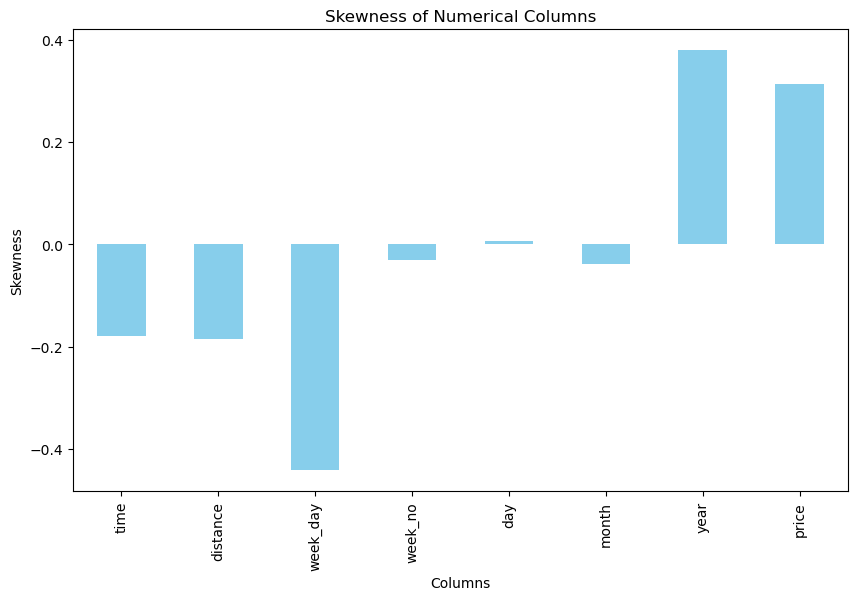

In [132]:
# Select numerical columns only
numerical_columns = flights_filtered.select_dtypes(include=['number']).columns

# Calculate skewness for numerical columns
skewness = flights_filtered[numerical_columns].skew()

# Plot skewness as a bar chart
skewness.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Skewness of Numerical Columns")
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

From the above result, we can check which variable is normally distributed and which is not.

The variables with skewness > 1 price are highly positively skewed.

The variables with skewness < -1 are highly negatively skewed.

The variables with 0.5 < skewness < 1 are moderately positively skewed.

The variables with -0.5 < skewness < -1 are moderately negatively skewed.

And, the variables with -0.5 < skewness < 0.5 are symmetric

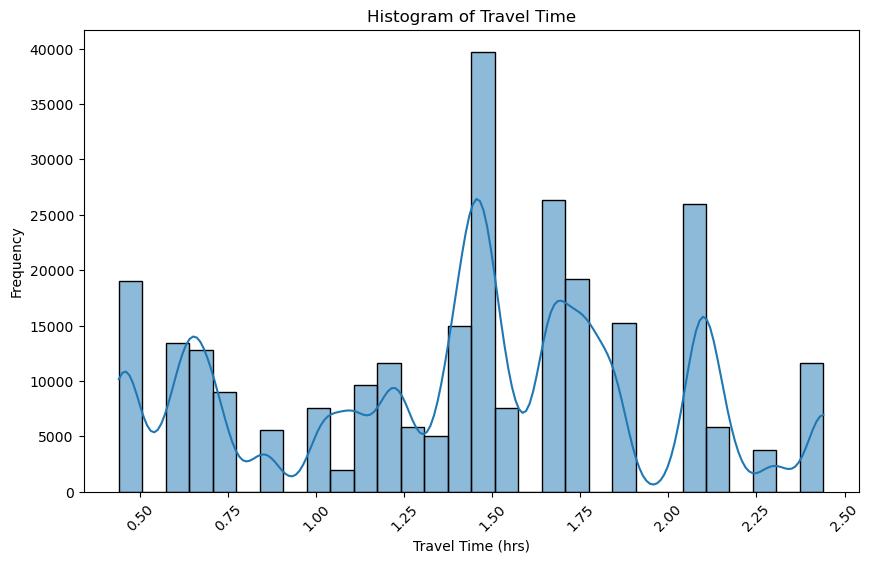

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with KDE of the 'time' column
plt.figure(figsize=(10, 6))
sns.histplot(flights_filtered['time'], bins=30, kde=True)
plt.title('Histogram of Travel Time')
plt.xlabel('Travel Time (hrs)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Inference from the plot:

The histogram shows the distribution of travel time, with the x-axis representing the travel time and the y-axis representing the frequency (i.e., the number of occurrences) of these travel time.

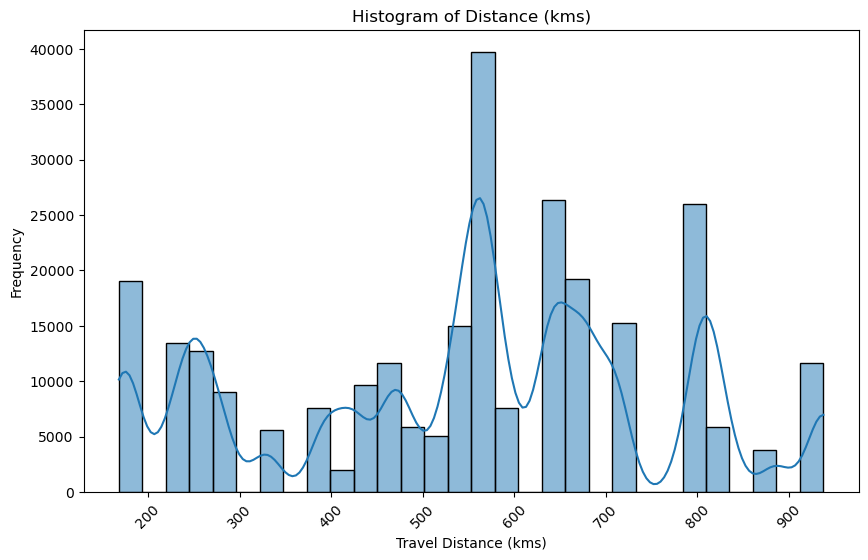

In [138]:
#Distribution of Distance column
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with KDE of the 'time' column
plt.figure(figsize=(10, 6))
sns.histplot(flights_filtered['distance'], bins=30, kde=True)
plt.title('Histogram of Distance (kms)')
plt.xlabel('Travel Distance (kms)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Inference from the plot:

The histogram shows the distribution of travel distance, with the x-axis representing the travel distance and the y-axis representing the frequency (i.e., the number of occurrences) of these travel distance.

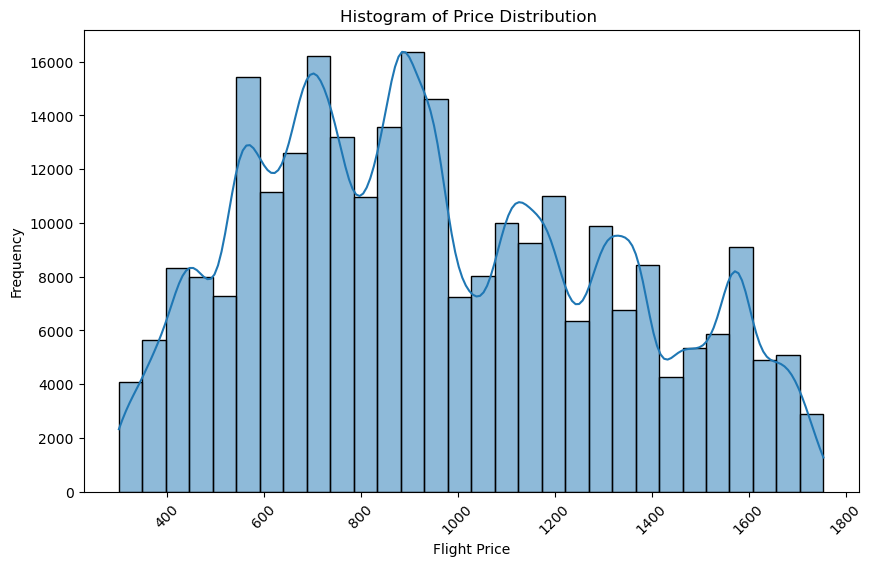

In [141]:
# Flight Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(flights_filtered['price'], bins=30, kde=True)
plt.title('Histogram of Price Distribution ')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Inference from the plot:

The majority of the prices seem to be concentrated in a relatively narrow range, indicating a common price range for these travel packages.

There is a long tail on the right side of the distribution, suggesting that there are a few travel packages with significantly higher prices compared to the majority.

The distribution appears to be right-skewed, with prices tapering off as they increase.

Overall, this plot provides insight into the distribution of prices, which is valuable information for understanding the pricing structure of the travel packages in the dataset.

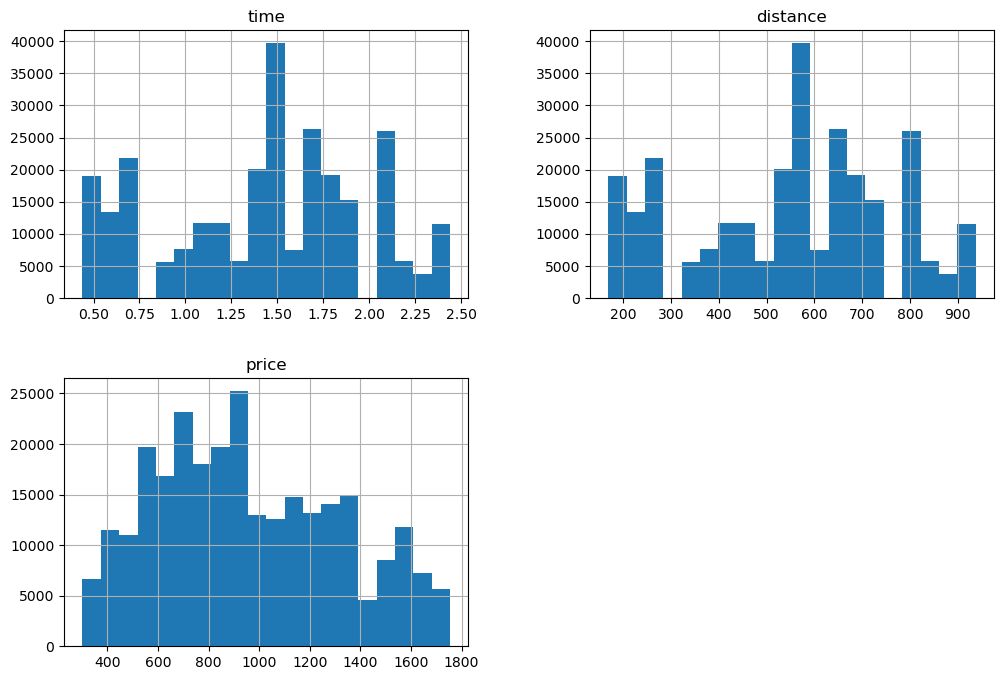

In [144]:
# Plot histograms for numeric columns
numeric_cols = flights_filtered.select_dtypes(include=['int64', 'float64']).columns
flights_filtered[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

# **Check for Outliers in Numerical Coulmns using Box-plot**
If the distribution of numerical column follows normal distribution, then use standad deviation to handle outliers.
Otherwise we will use IQR technique to handle outliers

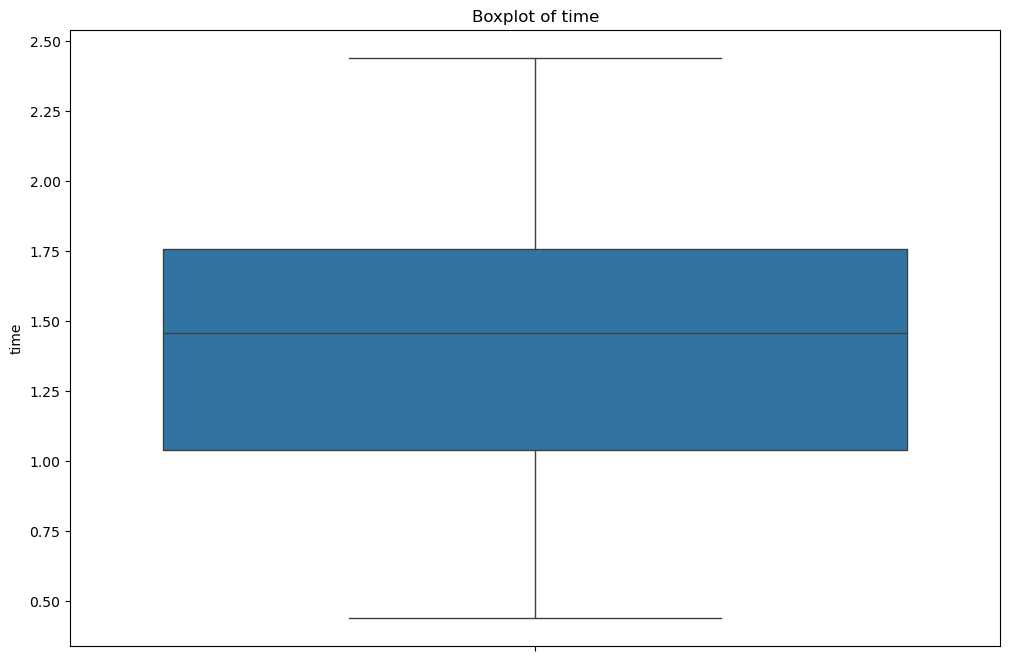

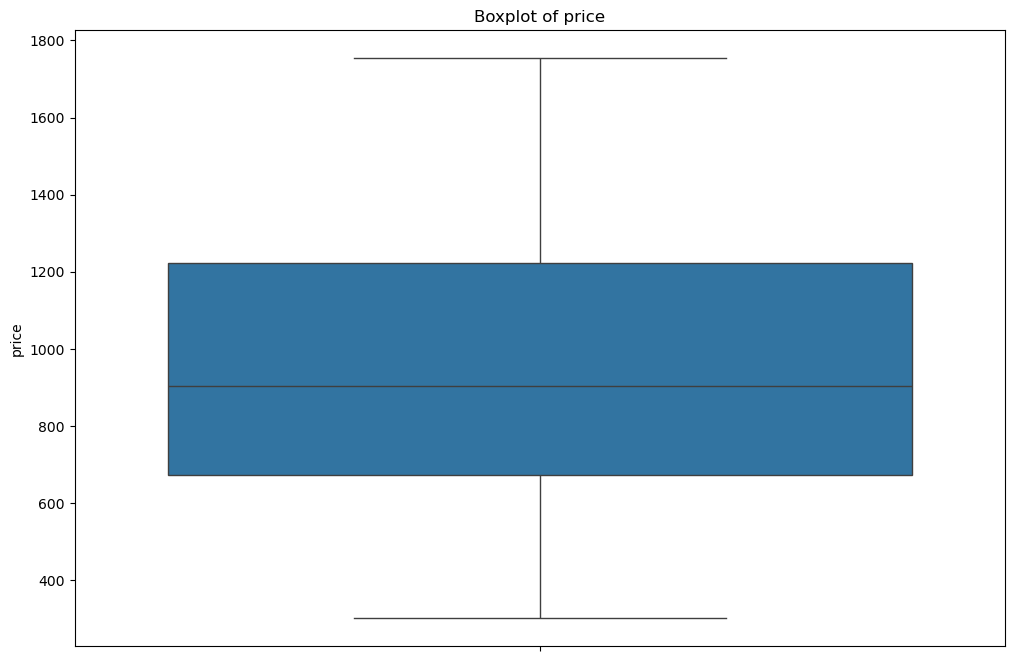

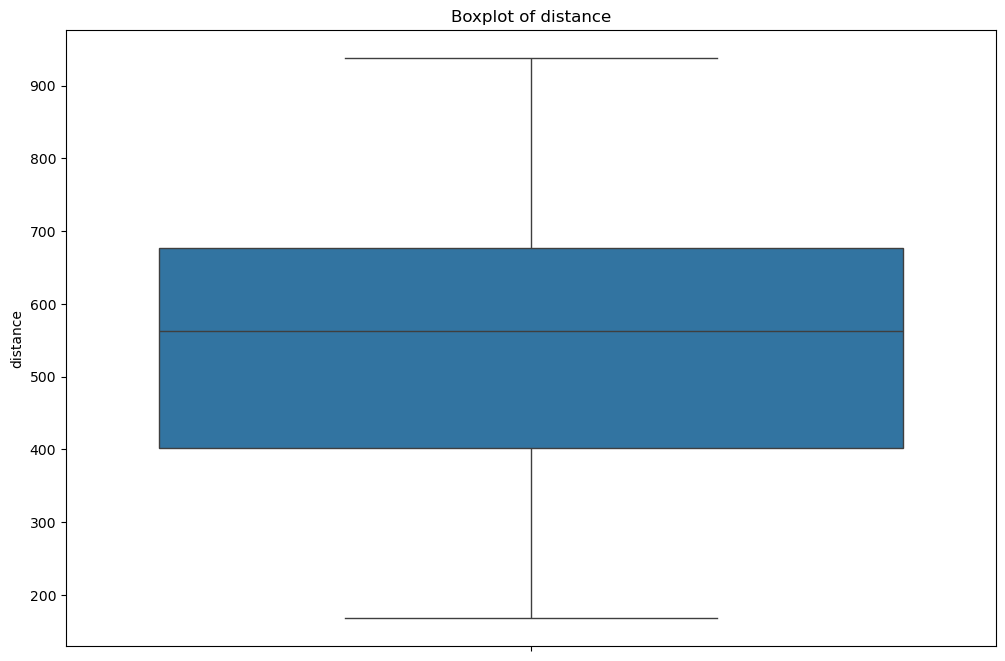

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot box plots
def plot_boxplot(data, column_name, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data[column_name])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

# Plot box plots for 'time' and 'price' columns
plot_boxplot(flights_filtered, 'time')
plot_boxplot(flights_filtered, 'price')
plot_boxplot(flights_filtered, 'distance')

## Distribution of categorical columns using count-plot

In [149]:
flights_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        271888 non-null  object 
 1   to          271888 non-null  object 
 2   flightType  271888 non-null  object 
 3   agency      271888 non-null  object 
 4   time        271888 non-null  float64
 5   distance    271888 non-null  float64
 6   week_day    271888 non-null  int32  
 7   week_no     271888 non-null  UInt32 
 8   day         271888 non-null  int32  
 9   month       271888 non-null  int32  
 10  year        271888 non-null  int32  
 11  price       271888 non-null  float64
dtypes: UInt32(1), float64(3), int32(4), object(4)
memory usage: 20.0+ MB


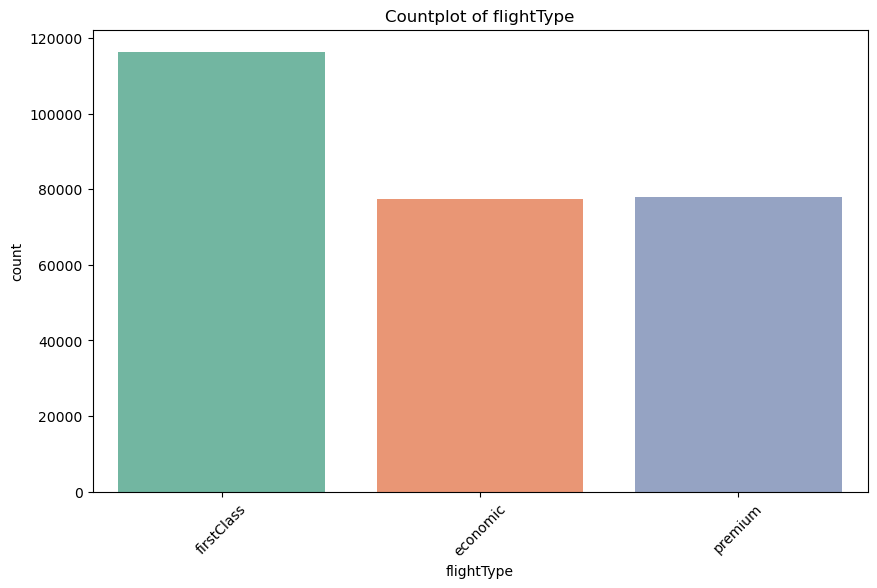

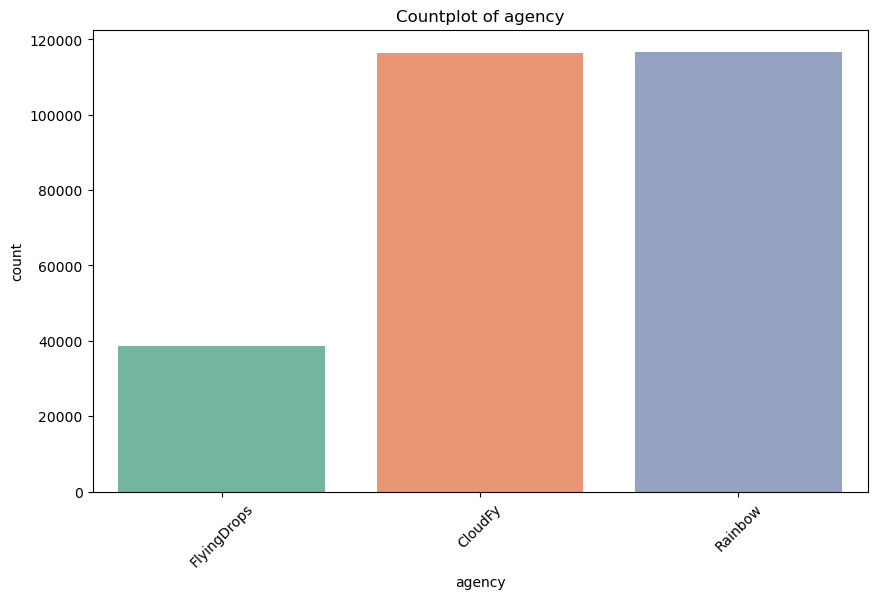

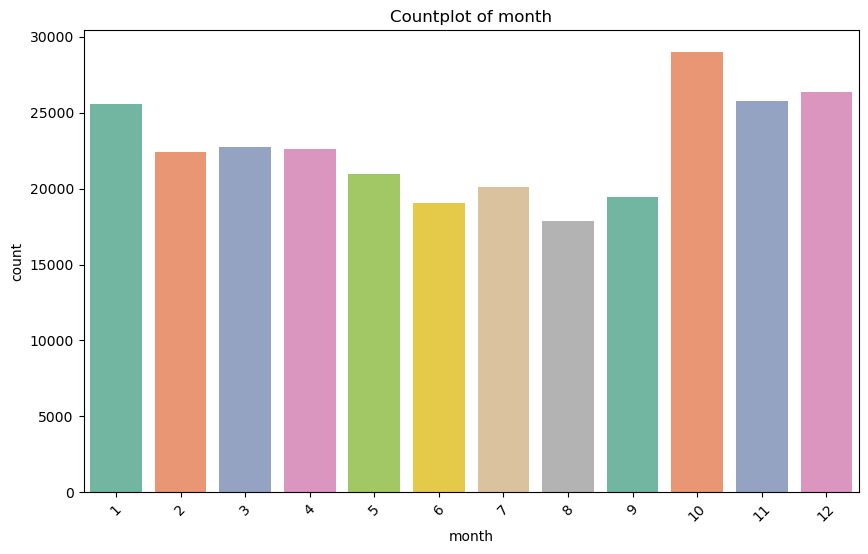

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot countplots for
columns_to_plot = ['flightType', 'agency', 'month']
data = [flights_filtered, flights_filtered, flights_filtered]  # Corresponding data for each plot

# Define a function to plot countplots
def plot_countplot(data, column_name, palette="Set2", figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=column_name, data=data, palette=palette)
    plt.title(f'Countplot of {column_name}')
    plt.xticks(rotation=45)
    plt.show()

# Plot countplots for the specified columns
for col, df in zip(columns_to_plot, data):
    plot_countplot(df, col)

## Distribution of Categorical Coulmns using pie-chart

flightType counts:
flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64


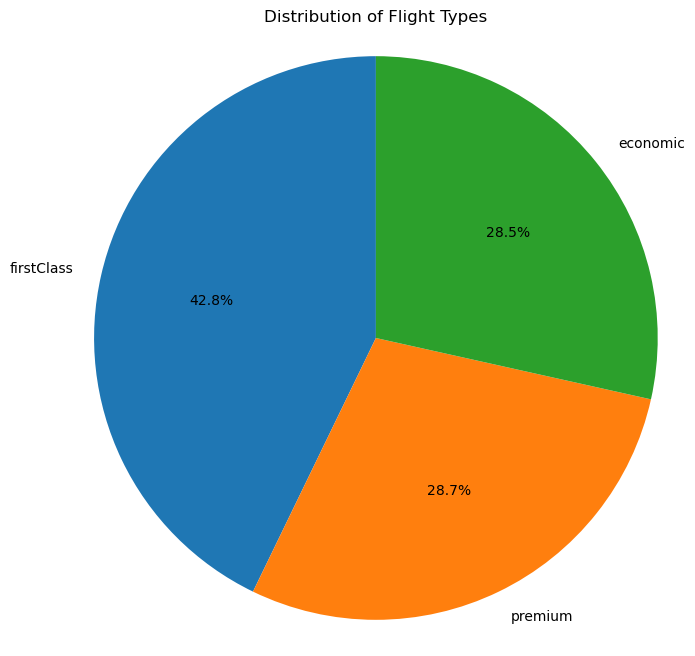

agency counts:
agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64


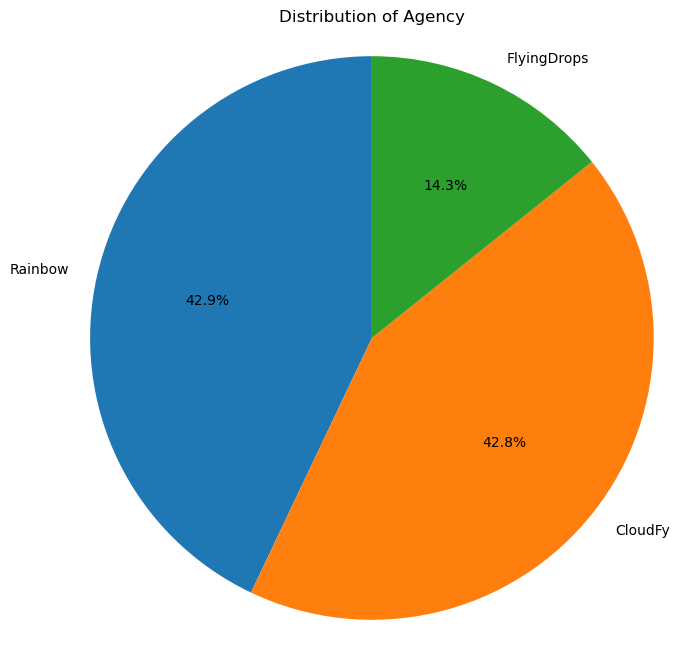

to counts:
to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64


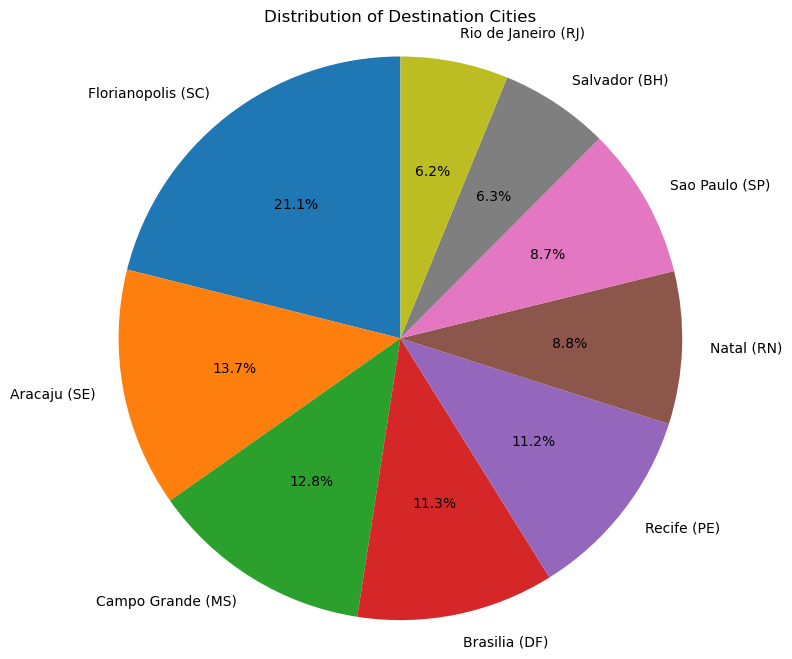

In [154]:
import matplotlib.pyplot as plt

# Define a function to create and display pie charts
def plot_pie_chart(data, column_name, title, figsize=(8, 8)):
    counts = data[column_name].value_counts()
    print(f'{column_name} counts:\n{counts}')
    plt.figure(figsize=figsize)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()

# Plot pie charts for different columns
plot_pie_chart(flights_filtered, 'flightType', 'Distribution of Flight Types')
plot_pie_chart(flights_filtered, 'agency', 'Distribution of Agency')
plot_pie_chart(flights_filtered, 'to', 'Distribution of Destination Cities')

Inference from the plot:

The pie chart illustrates the distribution of selected package types in the dataset. The data is categorized into three package types: Firstclass, economic, Premium.

Firstclass and Premium are the most common package types, each making up a significant portion of the dataset. economic is also fairly common, but slightly less frequent than Deluxe and Standard.

In [158]:
## Distribution of Values in Numerical Coulmns using a pie-chart

week_day counts:
week_day
3    135944
0     34108
6     34088
4     33880
5     33868
Name: count, dtype: int64


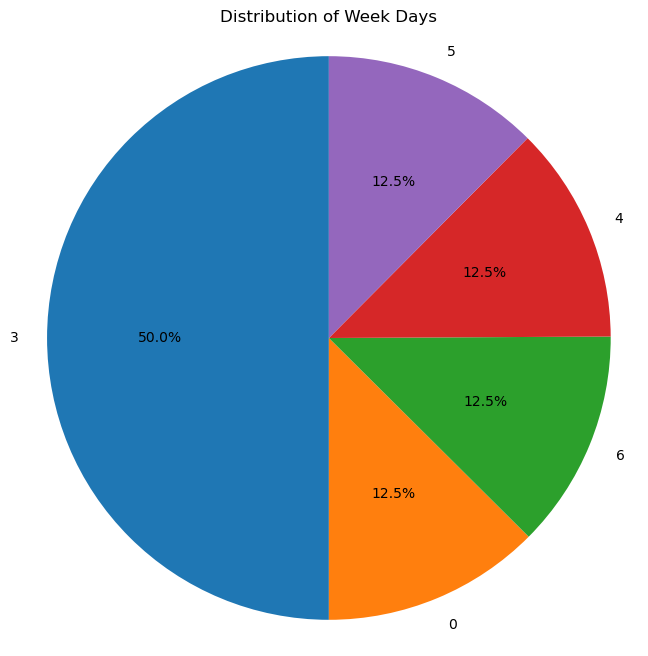

year counts:
year
2020    112571
2021     75363
2022     41761
2019     35826
2023      6367
Name: count, dtype: int64


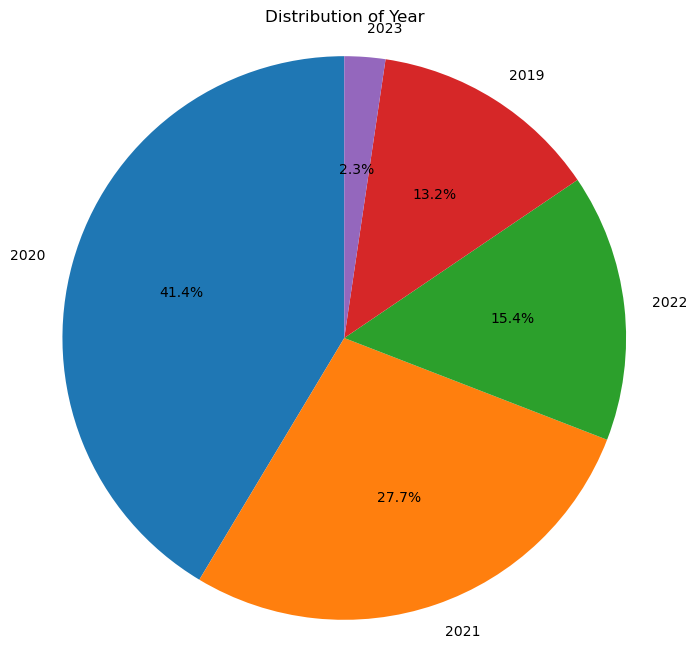

In [160]:
import matplotlib.pyplot as plt

# Define a function to create and display pie charts
def plot_pie_chart(data, column_name, title, figsize=(8, 8)):
    counts = data[column_name].value_counts()
    print(f'{column_name} counts:\n{counts}')
    plt.figure(figsize=figsize)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()

# Plot pie charts for numerical columns with discrete values
plot_pie_chart(flights_filtered, 'week_day', 'Distribution of Week Days')
plot_pie_chart(flights_filtered, 'year', 'Distribution of Year')


# **Bivariate Analysis**

Check for Linear relationship btwn Independent numerical Variable and Target variable

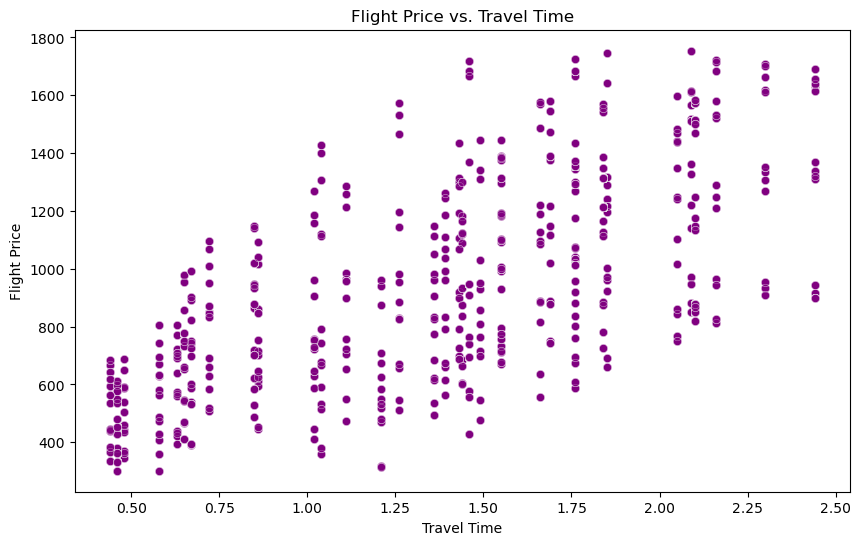

In [163]:
# Price vs. Travel Time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_filtered, x='time', y='price', color='purple', alpha=0.5)
plt.title('Flight Price vs. Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Flight Price')
plt.show()

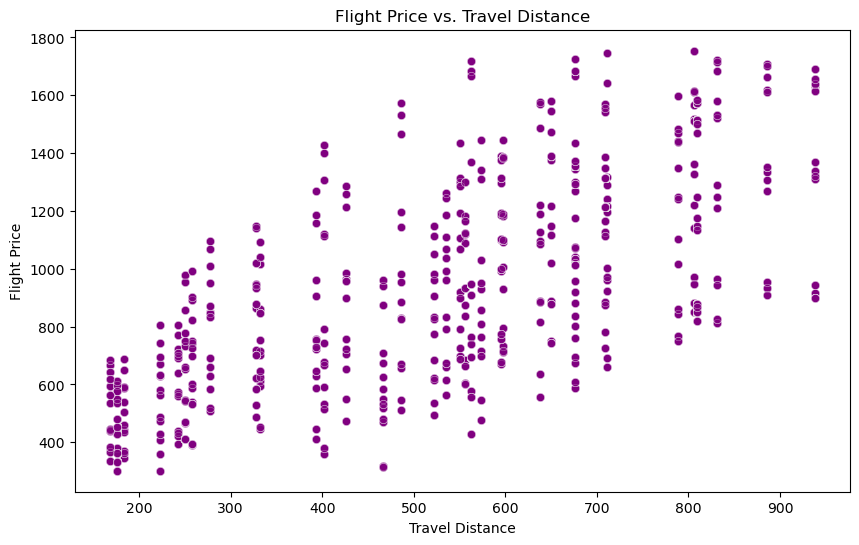

In [165]:
# Price vs. Travel Distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_filtered, x='distance', y='price', color='purple', alpha=0.5)
plt.title('Flight Price vs. Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Flight Price')
plt.show()

1. **Price vs. Hotel Ratings Plot**:
   - The plot examines the relationship between "Hotel Ratings" and "Per Person Price" for travel packages.
   - Each point represents a travel package, with its price on the y-axis and hotel ratings on the x-axis.

2. **Inference**:
   - There doesn't seem to be a strong linear correlation between hotel ratings and per person price.
   - Most data points are scattered across the plot, indicating that hotel ratings alone may not be a dominant factor in determining the price of travel packages.
   - However, there are some clusters of points, suggesting that specific rating ranges may have an impact on price within certain regions.

# checking for outliers in categorical columns

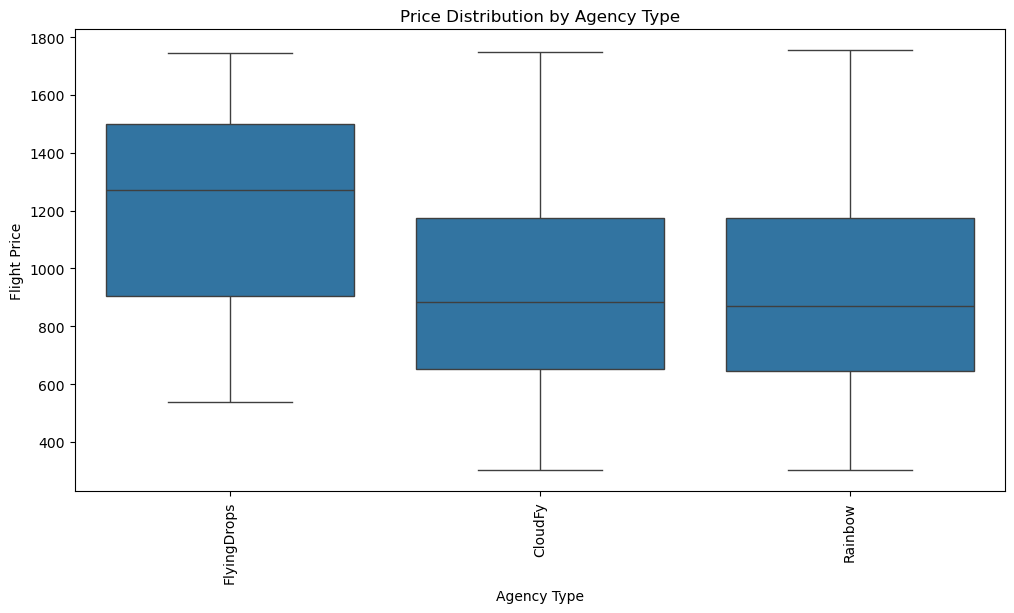

In [169]:
# Box Plots:
# Visualize the distribution of prices per agency type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flights_filtered, x='agency', y='price')
plt.xticks(rotation=90)
plt.xlabel('Agency Type')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Agency Type')
plt.show()

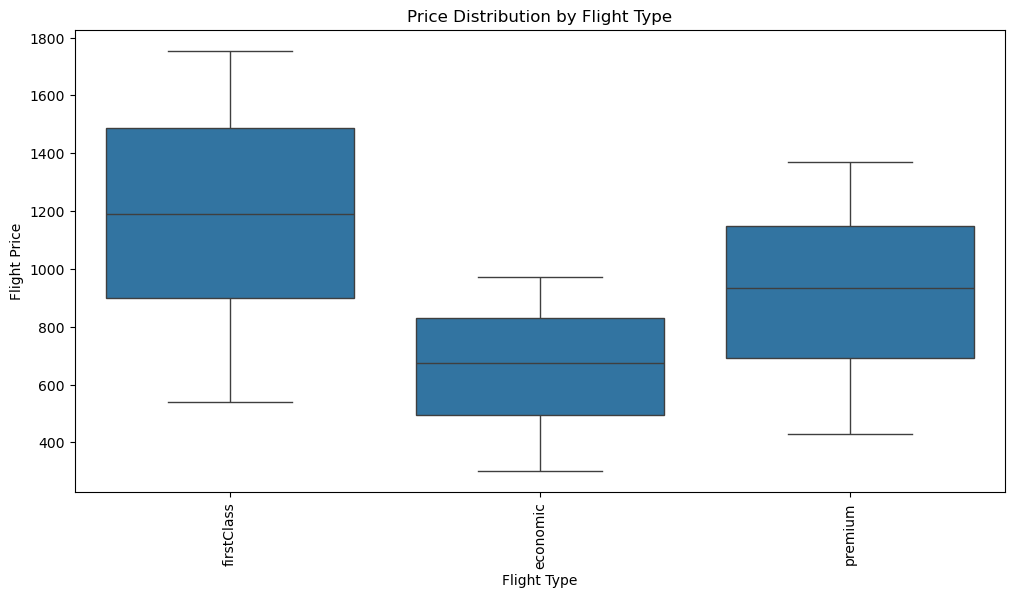

In [171]:
# Box Plots:
# Visualize the distribution of prices per Flight type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flights_filtered, x='flightType', y='price')
plt.xticks(rotation=90)
plt.xlabel('Flight Type')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Flight Type')
plt.show()

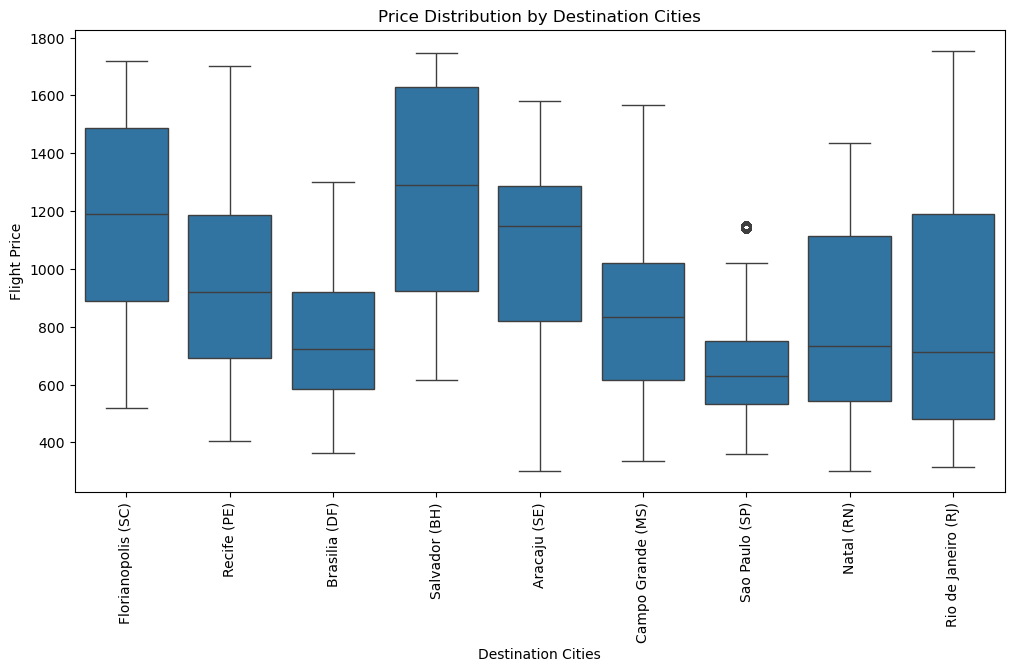

In [173]:
# Box Plots:
# Visualize the distribution of prices per Destination Cities:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flights_filtered, x='to', y='price')
plt.xticks(rotation=90)
plt.xlabel('Destination Cities')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Destination Cities')
plt.show()

**Inference of the plot**:

1. **Variability**: The box plots reveal varying levels of price variability within different package types. Some package types have a wider range of prices (larger boxes), while others have narrower ranges (smaller boxes).

2. **Outliers**: Outliers, represented as individual points beyond the "whiskers" of the boxes, can be seen in several package types. These outliers indicate some extreme price values within those categories.

3. **Median Prices**: The horizontal line inside each box represents the median price for each package type. It's a quick way to compare the typical prices across different categories.

4. **Package Type Impact**: The plot provides a visual sense of how package type influences price distribution. Some package types consistently have higher or lower prices than others.

### Visualize the distribution of prices per Categorical Coulmns using bar-plot

<Axes: xlabel='flightType', ylabel='price'>

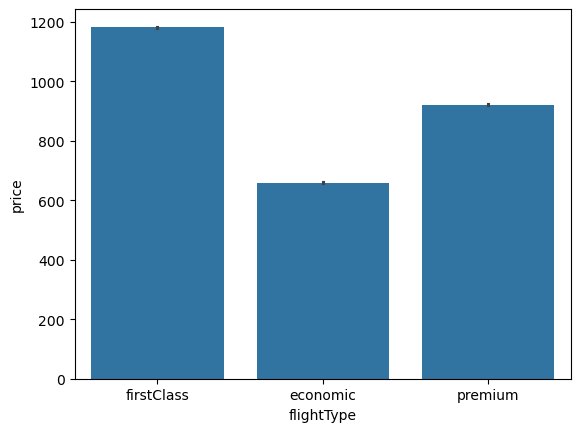

In [177]:
sns.barplot(x='flightType',y='price', data=flights_filtered)

The mean most expensive flight Class Type was the FirstClass, followed by Premium Class and Economic Class.

<Axes: xlabel='agency', ylabel='price'>

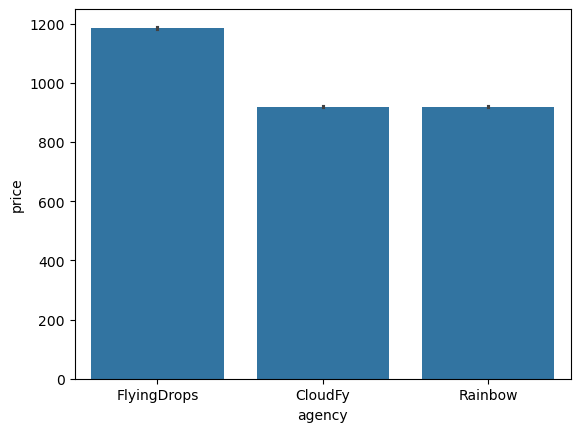

In [183]:
sns.barplot(x='agency',y='price', data=flights_filtered)

The mean most expensive flight tickets booked by agency was Flyingdrops, followed by Rainbow Class and Cloudfy agency.

## Multi-variate Analysis

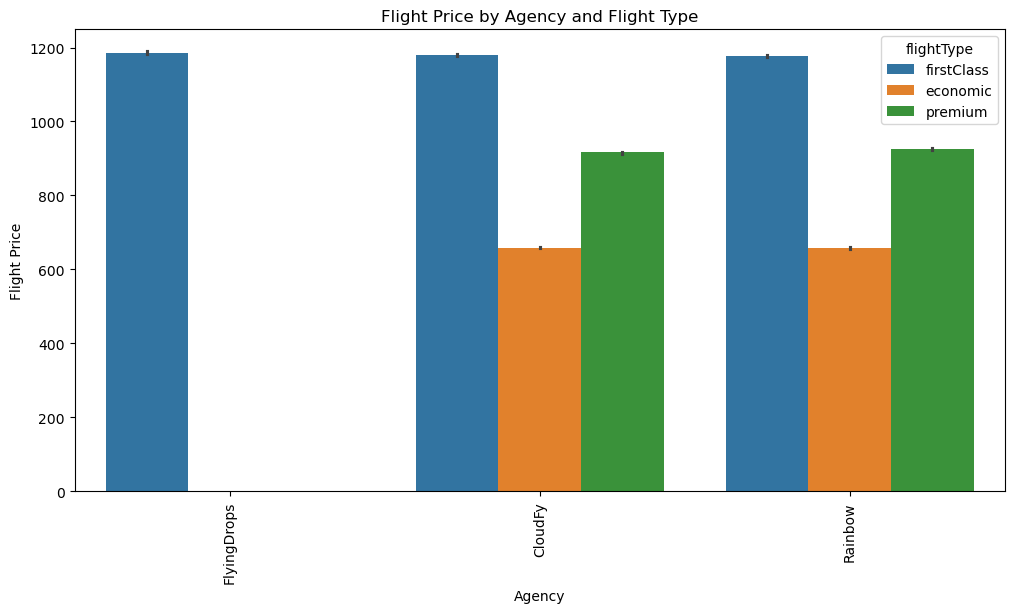

In [187]:
# Bar Plots:
# Explore the relationship between the agency and flight types:

plt.figure(figsize=(12, 6))
sns.barplot(data=flights_filtered, x='agency', y='price', hue='flightType')
plt.xticks(rotation=90)
plt.xlabel('Agency')
plt.ylabel('Flight Price')
plt.title('Flight Price by Agency and Flight Type')
plt.show()

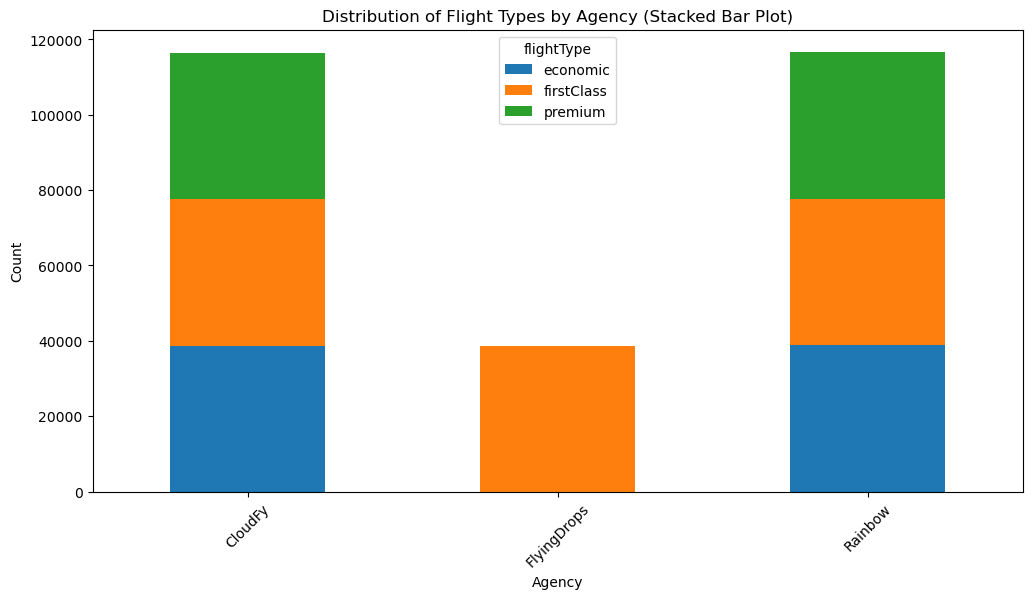

In [189]:
# Stacked Bar Plot:
# Show the distribution of flight types by agency using a stacked bar plot:

flight_package_counts = flights_filtered.groupby(['agency', 'flightType']).size().unstack(fill_value=0)
flight_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Distribution of Flight Types by Agency (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

Inference of the plot:

The plot shows that the agency Flyingdrops is quite popular in booking only first class tickets to its customers and no bookings in any other flight type"

On the contrary, rest two agencies are helping their customers to book their tickets in various flight Class apart from First Class. Both these agencies work in pretty much similar price ranges.

This information suggests that Flyingdrops only deals with HNI or Premium Customers and there is no diverse option apart from FirstClass Type for the customers.

Inference from the plot:

The stacked bar plot visualizes the distribution of package types by start city in the dataset.

In each start city, the stacked bars represent the different package types (Deluxe, Standard, Premium, Luxury, Budget). For example, in New Delhi Deluxe and Standard packages are more prevalent This plot allows you to see how the distribution of package types varies across both start cities, providing insights into regional preferences for package types.

In [192]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


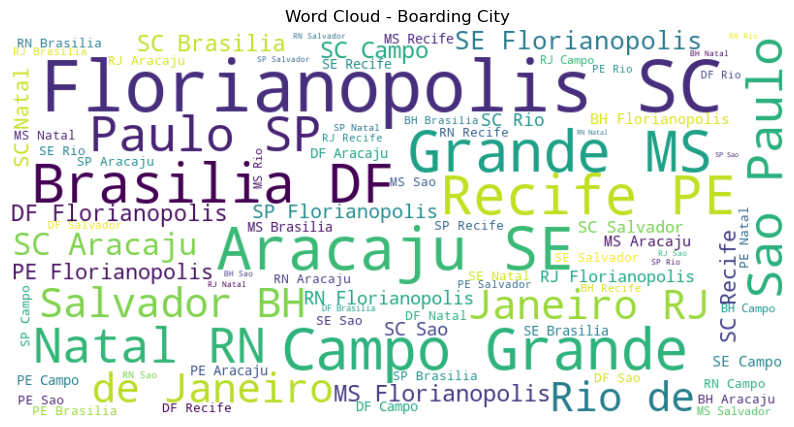

In [194]:
# Word Clouds:
# If you want to visualize common words in text columns like "Boarding City," you can create a word cloud:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flights['from']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Boarding City')
plt.show()

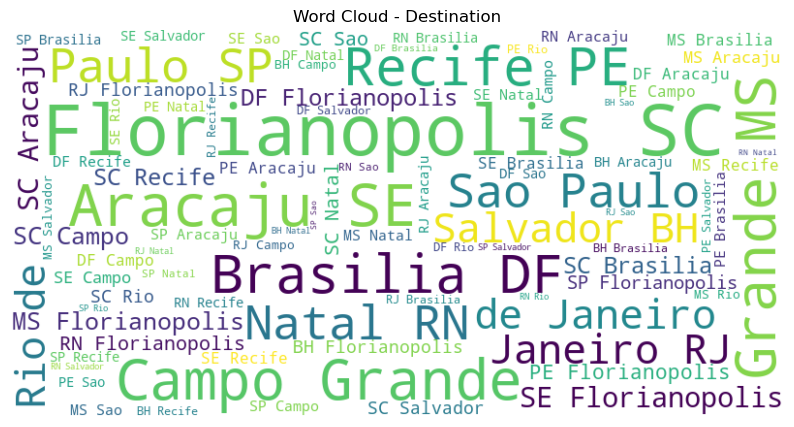

In [196]:
# Word Clouds:
# If you want to visualize common words in text columns like "Destination," you can create a word cloud:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flights['to']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Destination')
plt.show()

Inference from the plot:

The word cloud plot for the "Destination" column visually represents the most common words found in the text data. From the plot, it appears that some of the frequently mentioned destinations include Florianopolis, Grande, Sao Paulo, Brasilia DF, Natal RN and Aracaju SE. These destinations seem to be popular or commonly mentioned in the dataset.

In [199]:
# Feature Engineering
# renaming the Column name from "to" to "destination"
flights_filtered.rename(columns={"to":"destination"},inplace=True)

In [201]:
# Creating a new feature using distance and time columns
flights_filtered['flight_speed']=round(flights_filtered['distance']/flights_filtered['time'],2)

In [203]:
flights_filtered.head()

,from,destination,flightType,agency,time,distance,week_day,week_no,day,month,year,price,flight_speed
0,Recife (PE),Florianopolis (SC),firstClass,FlyingDrops,1.76,676.53,3,39,26,9,2019,1434.38,384.39
1,Florianopolis (SC),Recife (PE),firstClass,FlyingDrops,1.76,676.53,0,40,30,9,2019,1292.29,384.39
2,Brasilia (DF),Florianopolis (SC),firstClass,CloudFy,1.66,637.56,3,40,3,10,2019,1487.52,384.07
3,Florianopolis (SC),Brasilia (DF),firstClass,CloudFy,1.66,637.56,4,40,4,10,2019,1127.36,384.07
4,Aracaju (SE),Salvador (BH),firstClass,CloudFy,2.16,830.86,3,41,10,10,2019,1684.05,384.66


# Checking for the outliers in flight_speed column using box-plot

<Axes: xlabel='flight_speed'>

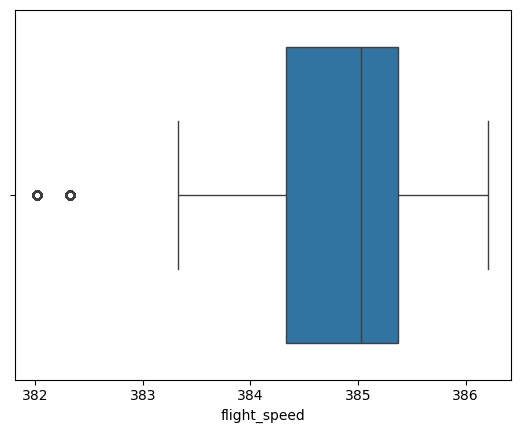

In [206]:
sns.boxplot(x=flights_filtered['flight_speed'])

# Checking outliers using IQR method

In [209]:
Q1= np.percentile(flights_filtered['flight_speed'],25)
Q3= np.percentile(flights_filtered['flight_speed'],75)
IQR= Q3-Q1

In [211]:
lower_bound= Q1-IQR*1.5
upper_bound= Q3+IQR*1.5
print(lower_bound,upper_bound)

382.77 386.93000000000006


Here's a revised explanation with the updated perspective on the outliers in the distribution of the flight speed column:

The distribution of the flight speed column in the above graph appears to be left-skewed, with outliers visible in the box plot below the flight speed of 383 km/hr. However, these data points should not be treated as outliers in this case.

Upon closer inspection, these speeds likely occurred due to bad weather conditions, which are valid real-world scenarios affecting flight speeds. Instead of removing or imputing these values, they should be retained for analysis, as they can provide critical insights into how external factors influence flight operations.

To further investigate, additional context such as weather data or flight logs could help confirm the reasoning behind these reduced speeds and support better decision-making for operational improvements.

In [214]:
df=flights_filtered.copy()
df.describe()

,time,distance,week_day,week_no,day,month,year,price,flight_speed
count,271888.000000,271888.000000,271888.000000,271888.0,271888.000000,271888.000000,271888.000000,271888.00000,271888.000000
mean,1.421147,546.955535,3.373521,27.04532,15.790458,6.607519,2020.522862,957.37503,384.785156
std,0.542541,208.851288,1.655530,15.793449,8.826961,3.606611,0.980161,362.31189,0.850795
min,0.440000,168.220000,0.000000,1.0,1.000000,1.000000,2019.000000,301.51000,382.020000
25%,1.040000,401.660000,3.000000,13.0,8.000000,3.000000,2020.000000,672.66000,384.330000
50%,1.460000,562.140000,3.000000,27.0,16.000000,7.000000,2020.000000,904.00000,385.030000
75%,1.760000,676.530000,4.000000,42.0,24.000000,10.000000,2021.000000,1222.24000,385.370000
max,2.440000,937.770000,6.000000,53.0,31.000000,12.000000,2023.000000,1754.17000,386.210000


In [216]:
flights_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   from          271888 non-null  object 
 1   destination   271888 non-null  object 
 2   flightType    271888 non-null  object 
 3   agency        271888 non-null  object 
 4   time          271888 non-null  float64
 5   distance      271888 non-null  float64
 6   week_day      271888 non-null  int32  
 7   week_no       271888 non-null  UInt32 
 8   day           271888 non-null  int32  
 9   month         271888 non-null  int32  
 10  year          271888 non-null  int32  
 11  price         271888 non-null  float64
 12  flight_speed  271888 non-null  float64
dtypes: UInt32(1), float64(4), int32(4), object(4)
memory usage: 22.0+ MB


# One-hot encoding

In [219]:
# Apply one-hot encoding to specific categorical columns
df = pd.get_dummies(
    df,
    columns=['from', 'destination', 'flightType', 'agency'],
    prefix=['from', 'destination', 'flightType', 'agency']
)

# Display the first few rows of the transformed DataFrame
df.head()

,time,distance,week_day,week_no,day,month,year,price,flight_speed,from_Aracaju (SE),...,destination_Recife (PE),destination_Rio de Janeiro (RJ),destination_Salvador (BH),destination_Sao Paulo (SP),flightType_economic,flightType_firstClass,flightType_premium,agency_CloudFy,agency_FlyingDrops,agency_Rainbow
0,1.76,676.53,3,39,26,9,2019,1434.38,384.39,False,...,False,False,False,False,False,True,False,False,True,False
1,1.76,676.53,0,40,30,9,2019,1292.29,384.39,False,...,True,False,False,False,False,True,False,False,True,False
2,1.66,637.56,3,40,3,10,2019,1487.52,384.07,False,...,False,False,False,False,False,True,False,True,False,False
3,1.66,637.56,4,40,4,10,2019,1127.36,384.07,False,...,False,False,False,False,False,True,False,True,False,False
4,2.16,830.86,3,41,10,10,2019,1684.05,384.66,True,...,False,False,True,False,False,True,False,True,False,False


In [221]:
df.shape

(271888, 33)

# Feature Selection

##**Feature Selection Using Statistical Test ANNOVA F-Test**

In [225]:
final_df1=df

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             271888 non-null  float64
 1   distance                         271888 non-null  float64
 2   week_day                         271888 non-null  int32  
 3   week_no                          271888 non-null  UInt32 
 4   day                              271888 non-null  int32  
 5   month                            271888 non-null  int32  
 6   year                             271888 non-null  int32  
 7   price                            271888 non-null  float64
 8   flight_speed                     271888 non-null  float64
 9   from_Aracaju (SE)                271888 non-null  bool   
 10  from_Brasilia (DF)               271888 non-null  bool   
 11  from_Campo Grande (MS)           271888 non-null  bool   
 12  fr

In [229]:
final_df1= df.drop(columns=['time','flight_speed','month','year','distance'],axis=1)

In [231]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming df is your DataFrame with features and target variable 'target'

# Separate features (X) and target variable (y)
X = final_df1.drop('price', axis=1)  # Features
y = final_df1['price']                # Target variable

# Get the numerical features in X
num_features = X.select_dtypes(include=['number']).columns

# If the number of features is less than k, adjust k to the number of available features
k = min(27, len(num_features))  # Ensure k doesn't exceed the number of available features

# ANOVA F-test for numerical features
f_selector = SelectKBest(score_func=f_classif, k=k)
f_selector.fit(X[num_features], y)

# Get indices of top k features
numerical_top_indices = f_selector.get_support(indices=True)

# Combine top indices
top_indices = list(numerical_top_indices)

# Get top k feature names
top_features = X.columns[top_indices]

# Display top k features
print("Top k selected features:")
print(top_features)

Top k selected features:
Index(['week_day', 'week_no', 'day'], dtype='object')


In [233]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [235]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Define the function to calculate VIF
def calc_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Filter numerical columns excluding boolean columns
numerical_columns = flights_filtered.select_dtypes(include=[np.number]).columns

# List of valid numerical columns
valid_columns = ['time', 'distance', 'week_day', 'week_no', 'day', 'month', 'year', 'price', 'flight_speed']

# Ensure all valid columns are numerical
filtered_df = flights_filtered[valid_columns]

# Convert 'UInt32' columns to float64
if 'week_no' in filtered_df.columns:
    filtered_df['week_no'] = filtered_df['week_no'].astype(float)

# Drop any constant or low-variance columns
filtered_df = filtered_df.loc[:, (filtered_df.var() > 0)]

# Check for any missing or infinite values
filtered_df = filtered_df.replace([np.inf, -np.inf], np.nan).dropna()

# Debugging: Inspect the filtered DataFrame
print("Filtered DataFrame Info:")
print(filtered_df.info())

# Calculate VIF
try:
    vif_result = calc_vif(filtered_df)
    print(vif_result)
except Exception as e:
    print(f"Error calculating VIF: {e}")

Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          271888 non-null  float64
 1   distance      271888 non-null  float64
 2   week_day      271888 non-null  int32  
 3   week_no       271888 non-null  float64
 4   day           271888 non-null  int32  
 5   month         271888 non-null  int32  
 6   year          271888 non-null  int32  
 7   price         271888 non-null  float64
 8   flight_speed  271888 non-null  float64
dtypes: float64(5), int32(4)
memory usage: 14.5 MB
None
        Feature           VIF
0          time  1.546121e+06
1      distance  1.548498e+06
2      week_day  5.160073e+00
3       week_no  7.255121e+01
4           day  4.427838e+00
5         month  8.001092e+01
6          year  7.911799e+05
7         price  1.362082e+01
8  flight_speed  7.937973e+05


In [236]:
X.rename(columns={'from_Sao Paulo (SP)':'from_Sao_Paulo (SP)','from_Rio de Janeiro (RJ)':'from_Rio_de_Janeiro (RJ)','from_Campo Grande (MS)':'from_Campo_Grande (MS)',
                                  'destination_Sao Paulo (SP)':'destination_Sao_Paulo (SP)','destination_Rio de Janeiro (RJ)':'destination_Rio_de_Janeiro (RJ)','destination_Campo Grande (MS)':'destination_Campo_Grande (MS)'},inplace=True)

In [239]:
features_ordering=['from_Florianopolis (SC)',
 'from_Sao_Paulo (SP)',
 'from_Salvador (BH)',
 'from_Brasilia (DF)',
 'from_Rio_de_Janeiro (RJ)',
 'from_Campo_Grande (MS)',
 'from_Aracaju (SE)',
 'from_Natal (RN)',
 'from_Recife (PE)',
 'destination_Florianopolis (SC)',
 'destination_Sao_Paulo (SP)',
 'destination_Salvador (BH)',
 'destination_Brasilia (DF)',
 'destination_Rio_de_Janeiro (RJ)',
 'destination_Campo_Grande (MS)',
 'destination_Aracaju (SE)',
 'destination_Natal (RN)',
 'destination_Recife (PE)',
 'flightType_economic',
 'flightType_firstClass',
 'flightType_premium',
 'agency_Rainbow',
 'agency_CloudFy',
 'agency_FlyingDrops',
 'week_no',
 'week_day']

In [241]:
#Ordering features based on flask output
final_features= X[features_ordering]

In [243]:
X1= final_features

# Target variable
y1 = y

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler_new = StandardScaler()

X_train1 = scaler_new.fit_transform(X_train1)
X_test1 = scaler_new.transform(X_test1)

In [245]:
final_features.columns

Index(['from_Florianopolis (SC)', 'from_Sao_Paulo (SP)', 'from_Salvador (BH)',
       'from_Brasilia (DF)', 'from_Rio_de_Janeiro (RJ)',
       'from_Campo_Grande (MS)', 'from_Aracaju (SE)', 'from_Natal (RN)',
       'from_Recife (PE)', 'destination_Florianopolis (SC)',
       'destination_Sao_Paulo (SP)', 'destination_Salvador (BH)',
       'destination_Brasilia (DF)', 'destination_Rio_de_Janeiro (RJ)',
       'destination_Campo_Grande (MS)', 'destination_Aracaju (SE)',
       'destination_Natal (RN)', 'destination_Recife (PE)',
       'flightType_economic', 'flightType_firstClass', 'flightType_premium',
       'agency_Rainbow', 'agency_CloudFy', 'agency_FlyingDrops', 'week_no',
       'week_day'],
      dtype='object')

#Model Building, Training, Cross-Validation, Hyperparameter Tuning & Evaluation

##Linear Regression

###Baseline Model

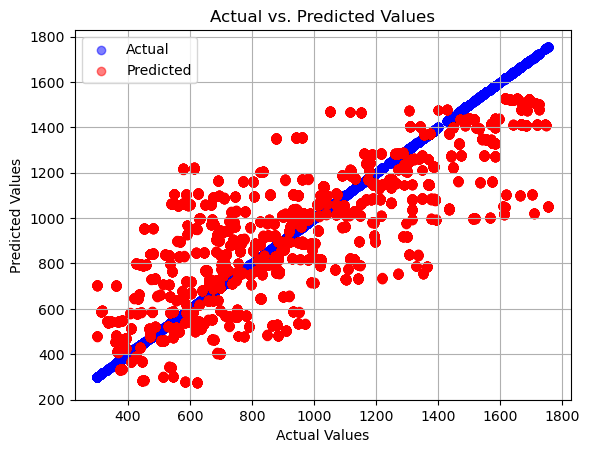

In [248]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = linear_model.predict(X_test1)

# Evaluate the model
mae_lr = mean_absolute_error(y_test1, y_pred1)
mse_lr = mean_squared_error(y_test1, y_pred1)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test1, y_pred1)

# Calculate adjusted R-squared for linear regression
n = X_test1.shape[0]
p = X_test1.shape[1]


# Calculate adjusted R-squared
adj_r2_lr = 1 - ((1 - r2_lr) * (n - 1) / (n - p - 1))


plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred1, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [250]:
# Model Evaluation
model_result = pd.DataFrame([['Linear Regression Baseline', mse_lr,rmse_lr,mae_lr, r2_lr,adj_r2_lr]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828


In [252]:
###Hyperparameter Tuning Linear
# Define hyperparameters and their potential values
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression
grid_lr = GridSearchCV(linear_model, param_grid_linear, cv=3, scoring='neg_mean_squared_error')
grid_lr.fit(X_train1, y_train1)

# Get the best hyperparameters for Linear Regression
best_linear_reg = grid_lr.best_estimator_

# Perform grid search
best_linear_reg.fit(X_train1, y_train1)

LinearRegression()

In [254]:
# Print the best hyperparameters
print("Best Hyperparameters for Linear Regression:", grid_lr.best_estimator_)

Best Hyperparameters for Linear Regression: LinearRegression()


In [256]:
## Model Evaluation
# Evaluate the model
y_pred_linear_tuned = best_linear_reg.predict(X_test1)

mae_linear_tuned = mean_absolute_error(y_test1, y_pred_linear_tuned )
mse_linear_tuned = mean_squared_error(y_test1, y_pred_linear_tuned )
rmse_linear_tuned = np.sqrt(mse_linear_tuned)
r2_linear_tuned = r2_score(y_test1, y_pred_linear_tuned )
adj_r2_linear_tuned = 1 - ((1 - r2_linear_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Linear Regression Tuned',  mse_linear_tuned,rmse_linear_tuned,mae_linear_tuned, r2_linear_tuned,adj_r2_linear_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828
1,Linear Regression Tuned,47041.768139,216.891144,165.424173,0.642999,0.642828


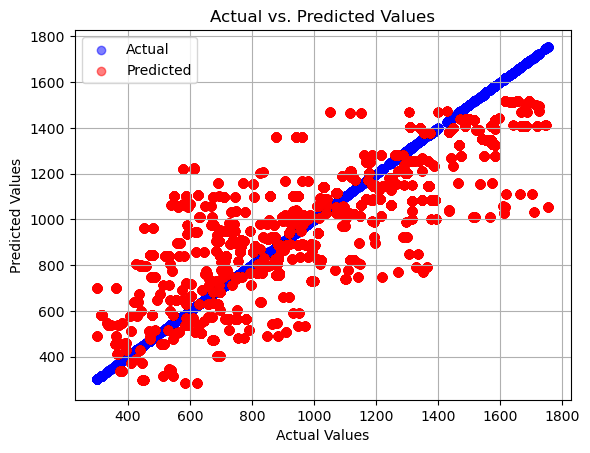

In [258]:
# Lasso regression
#base-line model

from sklearn.linear_model import Lasso
# Basic Lasso Regression
lasso_model = Lasso()  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train1, y_train1)

# Evaluate the model
y_pred_lasso = lasso_model.predict(X_test1)

mae_lasso = mean_absolute_error(y_test1, y_pred_lasso)
mse_lasso = mean_squared_error(y_test1, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test1, y_pred_lasso)
adj_r2_lasso = 1 - ((1 - r2_lasso) * (n - 1) / (n - p - 1))

plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_lasso, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [260]:
# Model Evaluation
model = pd.DataFrame([['Lasso Regression Baseline',  mse_lasso,rmse_lasso,mae_lasso, r2_lasso,adj_r2_lasso]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828
1,Linear Regression Tuned,47041.768139,216.891144,165.424173,0.642999,0.642828
2,Lasso Regression Baseline,47030.031372,216.864085,165.627060,0.643088,0.642917


# Hyperparameter Tuning Lasso

In [264]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their potential values
param_grid = {
    'alpha': [0.001,0.01, 0.1,0.3,0.5,0.6,0.8, 1.0,10]  # Adjust the range of alpha values as needed
}

# Create a GridSearchCV object for Lasso Regression
grid_search_lasso = GridSearchCV(lasso_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search_lasso.fit(X_train1, y_train1)

# Get the best hyperparameters for Lasso Regression
best_lasso_model = grid_search_lasso.best_estimator_

# Fit the best model to the training data
best_lasso_model.fit(X_train1, y_train1)

Lasso(alpha=0.01)

In [266]:
# Print the best hyperparameters
print("Best Hyperparameters for Lasso Regression:", grid_search_lasso.best_params_)

Best Hyperparameters for Lasso Regression: {'alpha': 0.01}


Model Evaluation

In [268]:
# Evaluate the model
y_pred_lasso_tuned = best_lasso_model.predict(X_test1)

mae_lasso_tuned = mean_absolute_error(y_test1, y_pred_lasso_tuned )
mse_lasso_tuned = mean_squared_error(y_test1, y_pred_lasso_tuned )
rmse_lasso_tuned = np.sqrt(mse_lasso_tuned)
r2_lasso_tuned = r2_score(y_test1, y_pred_lasso_tuned )
adj_r2_lasso_tuned = 1 - ((1 - r2_lasso_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Lasso Regression Tuned',  mse_lasso_tuned,rmse_lasso_tuned,mae_lasso_tuned, r2_lasso_tuned,adj_r2_lasso_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828
1,Linear Regression Tuned,47041.768139,216.891144,165.424173,0.642999,0.642828
2,Lasso Regression Baseline,47030.031372,216.864085,165.627060,0.643088,0.642917
3,Lasso Regression Tuned,47023.319846,216.848610,165.357816,0.643139,0.642968


# Ridge Regression

# Baseline Model

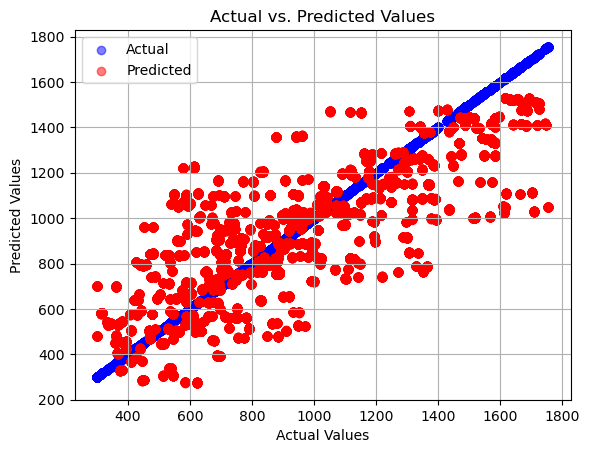

In [270]:
from sklearn.linear_model import Ridge

# Basic Ridge Regression
ridge_model = Ridge()  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train1, y_train1)

# Evaluate the model
y_pred_ridge = ridge_model.predict(X_test1)

mae_ridge = mean_absolute_error(y_test1, y_pred_ridge)
mse_ridge = mean_squared_error(y_test1,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test1, y_pred_ridge)
adj_r2_ridge = 1 - ((1 - r2_ridge) * (n - 1) / (n - p - 1))

plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_ridge, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [272]:
# Model Evaluation

model = pd.DataFrame([['Ridge Regression Baseline',  mse_ridge,rmse_ridge,mae_ridge, r2_ridge,adj_r2_ridge]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828
1,Linear Regression Tuned,47041.768139,216.891144,165.424173,0.642999,0.642828
2,Lasso Regression Baseline,47030.031372,216.864085,165.627060,0.643088,0.642917
3,Lasso Regression Tuned,47023.319846,216.848610,165.357816,0.643139,0.642968
4,Ridge Regression Baseline,47023.430658,216.848866,165.355628,0.643138,0.642967


In [274]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.001,0.01, 0.1,0.3,0.5,0.6,0.8, 1.0,10,20,50]  # Adjust the range of alpha values as needed
}


# Create a GridSearchCV object for Ridge Regression
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train1, y_train1)

# Get the best hyperparameters for Ridge Regression
best_ridge_model = grid_search_ridge.best_estimator_

# Perform grid search
best_ridge_model.fit(X_train1, y_train1)

Ridge(alpha=20)

In [276]:
# Print the best hyperparameters
print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_estimator_)

Best Hyperparameters for Ridge Regression: Ridge(alpha=20)


In [278]:
# Model Evaluation
y_pred_ridge_tuned = best_ridge_model.predict(X_test1)

mae_ridge_tuned = mean_absolute_error(y_test1, y_pred_ridge_tuned )
mse_ridge_tuned = mean_squared_error(y_test1, y_pred_ridge_tuned )
rmse_ridge_tuned = np.sqrt(mse_ridge_tuned)
r2_ridge_tuned = r2_score(y_test1, y_pred_ridge_tuned )
adj_r2_ridge_tuned = 1 - ((1 - r2_ridge_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Ridge Regression Tuned',  mse_ridge_tuned,rmse_ridge_tuned,mae_ridge_tuned, r2_ridge_tuned,adj_r2_ridge_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47041.768139,216.891144,165.424173,0.642999,0.642828
1,Linear Regression Tuned,47041.768139,216.891144,165.424173,0.642999,0.642828
2,Lasso Regression Baseline,47030.031372,216.864085,165.627060,0.643088,0.642917
3,Lasso Regression Tuned,47023.319846,216.848610,165.357816,0.643139,0.642968
4,Ridge Regression Baseline,47023.430658,216.848866,165.355628,0.643138,0.642967
5,Ridge Regression Tuned,47023.382528,216.848755,165.356538,0.643138,0.642968


# Decision Tree

# Baseline model

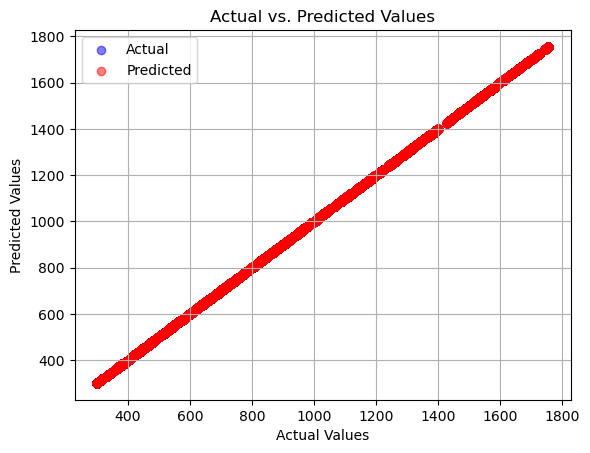

In [280]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_decision = decision_tree_reg.predict(X_test1)

# Evaluate the model
mse_dt = mean_squared_error(y_test1, y_pred_decision)
rmse_dt = mse_dt**0.5
mae_dt = mean_absolute_error(y_test1, y_pred_decision)
r2_dt = r2_score(y_test1, y_pred_decision)
adj_r2_dt = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))

plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_decision, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [282]:
# Evaluation of the model
model = pd.DataFrame([['Decision Tree Baseline',  mse_dt,rmse_dt,mae_dt, r2_dt,adj_r2_dt]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
1,Linear Regression Tuned,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
2,Lasso Regression Baseline,4.703003e+04,2.168641e+02,1.656271e+02,0.643088,0.642917
3,Lasso Regression Tuned,4.702332e+04,2.168486e+02,1.653578e+02,0.643139,0.642968
4,Ridge Regression Baseline,4.702343e+04,2.168489e+02,1.653556e+02,0.643138,0.642967
5,Ridge Regression Tuned,4.702338e+04,2.168488e+02,1.653565e+02,0.643138,0.642968
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.000000,1.000000


### Hyper parameter Tuning

In [288]:
# Define hyperparameters and their potential values
param_grid_dt = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [15,30,45],
    'min_samples_split': [2,3,5],
    'max_features': [15,27,'sqrt'],
    'ccp_alpha' :[1,2]
}

# Create a GridSearchCV object for Decision Tree Regressor
grid_search_dt = GridSearchCV(decision_tree_reg, param_grid_dt, cv=3, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train1, y_train1)

# Get the best hyperparameters for Decision Tree Regressor
best_decision_tree_model = grid_search_dt.best_estimator_

In [290]:
# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_estimator_)

Best Hyperparameters for Decision Tree: DecisionTreeRegressor(ccp_alpha=1, criterion='friedman_mse', max_depth=30,
                      max_features=27, random_state=42)


In [292]:
# Model Evaluation
# Evaluating the best model
y_pred_dt_tuned = best_decision_tree_model.predict(X_test1)

mae_dt_tuned = mean_absolute_error(y_test1, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test1, y_pred_dt_tuned)
rmse_dt_tuned = np.sqrt(mse_dt_tuned)
r2_dt_tuned = r2_score(y_test1, y_pred_dt_tuned)
adj_r2_dt_tuned = 1 - ((1 - r2_dt_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Decision Tree Tuned',  mse_dt_tuned,rmse_dt_tuned,mae_dt_tuned, r2_dt_tuned,adj_r2_dt_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
1,Linear Regression Tuned,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
2,Lasso Regression Baseline,4.703003e+04,2.168641e+02,1.656271e+02,0.643088,0.642917
3,Lasso Regression Tuned,4.702332e+04,2.168486e+02,1.653578e+02,0.643139,0.642968
4,Ridge Regression Baseline,4.702343e+04,2.168489e+02,1.653556e+02,0.643138,0.642967
5,Ridge Regression Tuned,4.702338e+04,2.168488e+02,1.653565e+02,0.643138,0.642968
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.000000,1.000000
7,Decision Tree Tuned,4.442886e+01,6.665498e+00,4.023163e+00,0.999663,0.999663


# Feature Importance Decision Tree

In [ ]:
# Get feature importances
feature_importances_dt_reg = best_decision_tree_model.feature_importances_

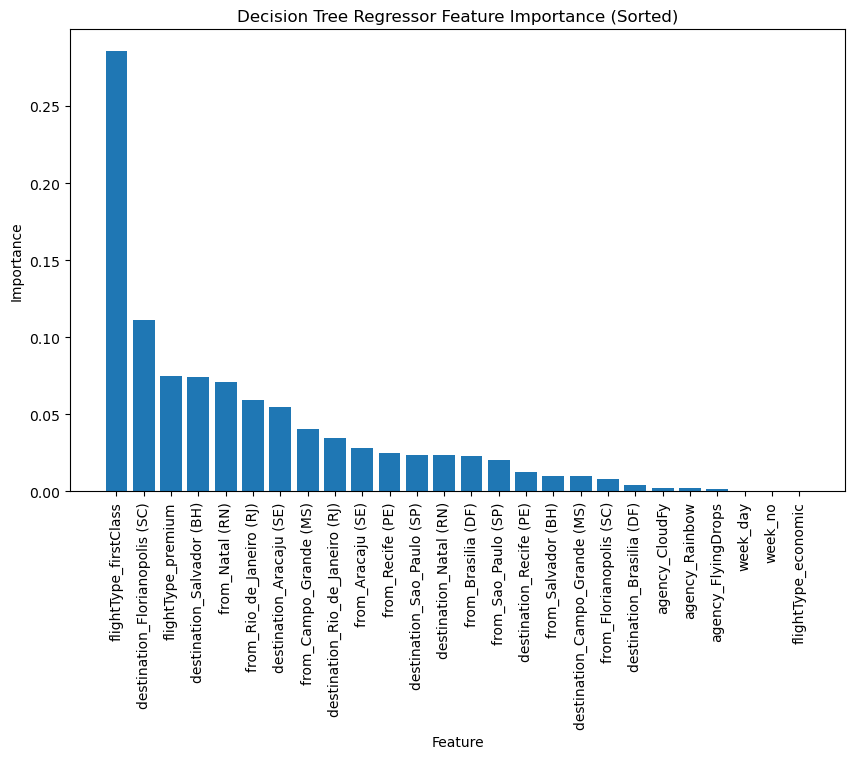

In [304]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X1, y1)  # Make sure X1 and y1 are defined
feature_importances_dt_reg = dt_reg.feature_importances_

# Define feature names
feature_names = X1.columns.tolist()  # Assuming X_train is a DataFrame

# Zip feature names and importances
feature_importances_sorted = sorted(zip(feature_names, feature_importances_dt_reg), key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*feature_importances_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Regressor Feature Importance (Sorted)')
plt.show()

# Random Forest
# Baseline Model

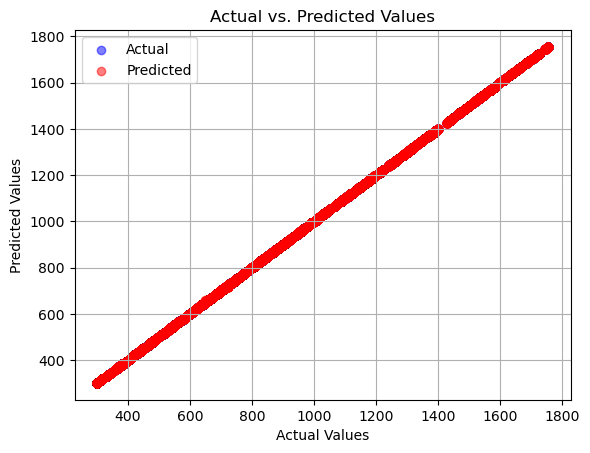

In [306]:
# Create and train the Linear Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test1)

# Evaluate the model
mae_rf = mean_absolute_error(y_test1,y_pred_rf)
mse_rf = mean_squared_error(y_test1, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test1, y_pred_rf)
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))



plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_rf, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

model = pd.DataFrame([['Random Forest Baseline',  mse_rf,rmse_rf,mae_rf, r2_rf,adj_r2_rf]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

In [ ]:
## Hyper parameter Tuning

In [ ]:
# Define hyperparameters and their potential values
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [1,5,10],
    'min_samples_split': [2, 5,10],
    'max_features': ['sqrt',27],
    'n_jobs': [2]
}
# Create a GridSearchCV object for Random Forest Regression
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train1, y_train1)
# Get the best hyperparameters for Random Forest Regression
best_rf_model = grid_search_rf.best_estimator_

In [312]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=2,
                      random_state=42)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=2,
                      random_state=42)

In [314]:
#Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_estimator_)

Best Hyperparameters for Random Forest: RandomForestRegressor(max_depth=10, max_features='sqrt', n_jobs=2,
                      random_state=42)


In [316]:
# Model Evaluation
y_pred_rf_tuned = best_rf_model.predict(X_test1)

mae_rf_tuned = mean_absolute_error(y_test1, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test1, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test1, y_pred_rf_tuned)
adj_r2_rf_tuned = 1 - ((1 - r2_rf_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Random Forest Tuned',  mse_rf_tuned,rmse_rf_tuned,mae_rf_tuned, r2_rf_tuned,adj_r2_rf_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
1,Linear Regression Tuned,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
2,Lasso Regression Baseline,4.703003e+04,2.168641e+02,1.656271e+02,0.643088,0.642917
3,Lasso Regression Tuned,4.702332e+04,2.168486e+02,1.653578e+02,0.643139,0.642968
4,Ridge Regression Baseline,4.702343e+04,2.168489e+02,1.653556e+02,0.643138,0.642967
5,Ridge Regression Tuned,4.702338e+04,2.168488e+02,1.653565e+02,0.643138,0.642968
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.000000,1.000000
7,Decision Tree Tuned,4.442886e+01,6.665498e+00,4.023163e+00,0.999663,0.999663
8,Random Forest Baseline,2.515837e-02,1.586139e-01,7.705278e-03,1.000000,1.000000
9,Random Forest Tuned,1.779999e+04,1.334166e+02,9.953841e+01,0.864915,0.864851


In [318]:
# Feature importance Random Forest

feature_importances_rf_reg = best_rf_model.feature_importances_

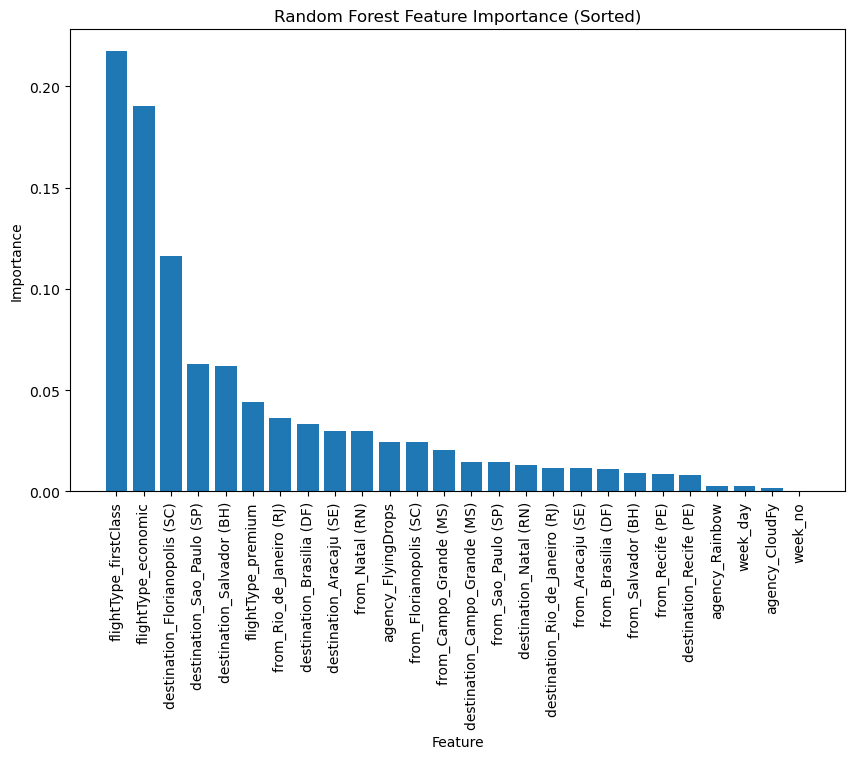

In [320]:
import matplotlib.pyplot as plt

# Define feature names
feature_names = X1.columns.tolist()  # Assuming X_train is a DataFrame

# Zip feature names and importances
feature_importances_sorted = sorted(zip(feature_names, feature_importances_rf_reg), key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*feature_importances_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance (Sorted)')
plt.show()

# XG-BOOST
# Baseline

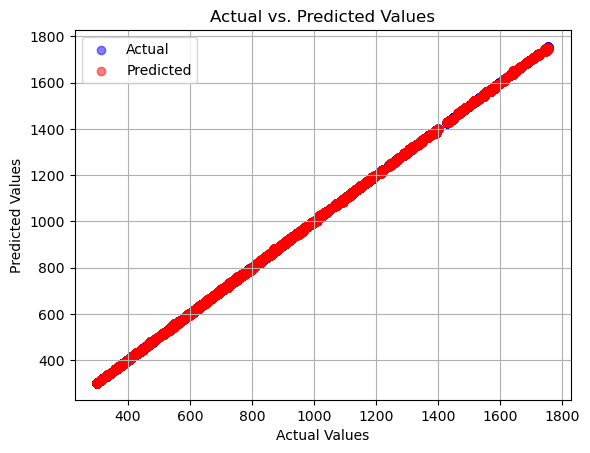

In [322]:
# Import the XGBRegressor class
from xgboost import XGBRegressor
# Define Basic XGBoost regressor
xgb_regressor_model = XGBRegressor(random_state=42)
xgb_regressor_model.fit(X_train1, y_train1)

# Evaluate the model
y_pred_xgb = xgb_regressor_model.predict(X_test1)

mae_xgb = mean_absolute_error(y_test1, y_pred_xgb)
mse_xgb = mean_squared_error(y_test1,y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test1, y_pred_xgb)
adj_r2_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))

plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_xgb, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [324]:
# Model Evaluation
model = pd.DataFrame([['XGBoost Baseline',  mse_xgb,rmse_xgb,mae_xgb, r2_xgb,adj_r2_xgb]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
1,Linear Regression Tuned,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
2,Lasso Regression Baseline,4.703003e+04,2.168641e+02,1.656271e+02,0.643088,0.642917
3,Lasso Regression Tuned,4.702332e+04,2.168486e+02,1.653578e+02,0.643139,0.642968
4,Ridge Regression Baseline,4.702343e+04,2.168489e+02,1.653556e+02,0.643138,0.642967
5,Ridge Regression Tuned,4.702338e+04,2.168488e+02,1.653565e+02,0.643138,0.642968
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.000000,1.000000
7,Decision Tree Tuned,4.442886e+01,6.665498e+00,4.023163e+00,0.999663,0.999663
8,Random Forest Baseline,2.515837e-02,1.586139e-01,7.705278e-03,1.000000,1.000000
9,Random Forest Tuned,1.779999e+04,1.334166e+02,9.953841e+01,0.864915,0.864851


# Hyper paramenter tuning

In [326]:
# !pip uninstall scikit-learn xgboost
# !pip install scikit-learn xgboost

In [328]:
import xgboost as xgb
import sklearn

print(f"xgboost version: {xgb.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

xgboost version: 2.1.4
scikit-learn version: 1.5.1


In [330]:
from xgboost.sklearn import XGBRegressor
param_grid = {
    'n_estimators': [3, 5],
    'max_depth': [35, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.1]
}
from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgb_regressor_model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search_xgb.fit(X_train1, y_train1)

# Get the best model and parameters
best_xgb_regressor = random_search_xgb.best_estimator_
print("Best hyperparameters:", random_search_xgb.best_params_)

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 5, 'max_depth': 50, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [332]:
random_search_xgb.best_params_

{'subsample': 1.0,
 'n_estimators': 5,
 'max_depth': 50,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [334]:
# Print the best hyperparameters
print("Best Hyperparameters for XGBoost Regressor:", random_search_xgb.best_params_)

Best Hyperparameters for XGBoost Regressor: {'subsample': 1.0, 'n_estimators': 5, 'max_depth': 50, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [336]:
# Model Evaluation

In [338]:
# Evaluate the best model
y_pred_xgb_tuned = best_xgb_regressor.predict(X_test1)

mae_xgb_tuned = mean_absolute_error(y_test1, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test1, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test1, y_pred_xgb_tuned)
adj_r2_xgb_tuned = 1 - ((1 - r2_xgb_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['XGBosst Model Tuned',  mse_xgb_tuned,rmse_xgb_tuned,mae_xgb_tuned, r2_xgb_tuned,adj_r2_xgb_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
1,Linear Regression Tuned,4.704177e+04,2.168911e+02,1.654242e+02,0.642999,0.642828
2,Lasso Regression Baseline,4.703003e+04,2.168641e+02,1.656271e+02,0.643088,0.642917
3,Lasso Regression Tuned,4.702332e+04,2.168486e+02,1.653578e+02,0.643139,0.642968
4,Ridge Regression Baseline,4.702343e+04,2.168489e+02,1.653556e+02,0.643138,0.642967
5,Ridge Regression Tuned,4.702338e+04,2.168488e+02,1.653565e+02,0.643138,0.642968
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.000000,1.000000
7,Decision Tree Tuned,4.442886e+01,6.665498e+00,4.023163e+00,0.999663,0.999663
8,Random Forest Baseline,2.515837e-02,1.586139e-01,7.705278e-03,1.000000,1.000000
9,Random Forest Tuned,1.779999e+04,1.334166e+02,9.953841e+01,0.864915,0.864851


In [340]:
y_pred_rf = best_xgb_regressor.predict(X_test1)
y_pred_rf_tr = best_xgb_regressor.predict(X_train1)

In [342]:
#Training data Metrics

mse_rf_tr = mean_squared_error(y_train1, y_pred_rf_tr)
rmse_rf_tr = np.sqrt(mse_rf_tr)
mae_rf_tr = mean_absolute_error(y_train1, y_pred_rf_tr)
r2_rf_tr = r2_score(y_train1, y_pred_rf_tr)
adj_r2_rf_tr = 1 - ((1 - r2_rf_tr) * (n - 1) / (n - p - 1))

#Test data Metrics
mse_rf = mean_squared_error(y_test1, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test1, y_pred_rf)
r2_rf = r2_score(y_test1, y_pred_rf)
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

In [344]:
print("\nRandom Forest Regression Train Metrics:")
print("Mean Squared Error (MSE):", mse_rf_tr)
print("Root Mean Squared Error (RMSE):", rmse_rf_tr)
print("Mean Absolute Error (MAE):", mae_rf_tr)
print("R-squared (R2) Score:", r2_rf_tr)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_rf_tr)


print("\nRandom Forest Regression Test Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_rf)


Random Forest Regression Train Metrics:
Mean Squared Error (MSE): 45825.193594095836
Root Mean Squared Error (RMSE): 214.06819846510558
Mean Absolute Error (MAE): 179.68028112645376
R-squared (R2) Score: 0.6505744589162429
Adjusted R-squared (Adj R2) Score: 0.6504073034992648

Random Forest Regression Test Metrics:
Mean Squared Error (MSE): 46035.37146036219
Root Mean Squared Error (RMSE): 214.55855019169522
Mean Absolute Error (MAE): 180.11152212287243
R-squared (R2) Score: 0.6506363387706208
Adjusted R-squared (Adj R2) Score: 0.6504692129552363


In [346]:
feature_importances_xgb_reg = best_xgb_regressor.feature_importances_

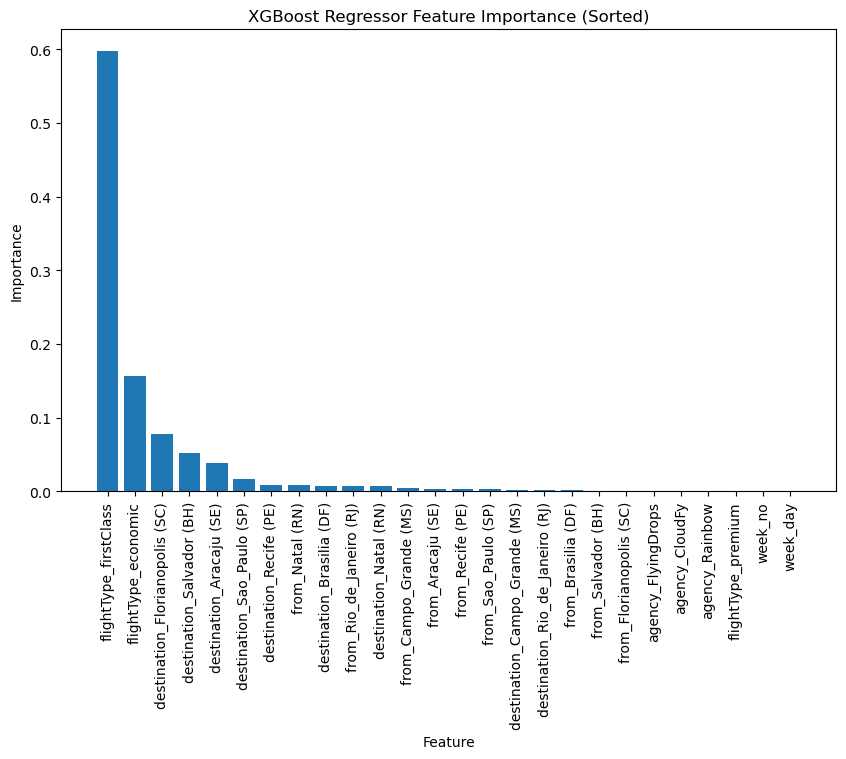

In [348]:
import matplotlib.pyplot as plt

# Define feature names
feature_names = X1.columns.tolist()  # Assuming X_train is a DataFrame

# Zip feature names and importances
feature_importances_sorted = sorted(zip(feature_names, feature_importances_xgb_reg), key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*feature_importances_sorted)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Regressor Feature Importance (Sorted)')
plt.show()

In [350]:
# Benchmark models
#Benchmark Model on the basis on RMSE metric
model_result[model_result['RMSE']==model_result['RMSE'].min()]

,Model,MSE,RMSE,MAE,R2,adj_r2
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.0,1.0


In [352]:
#Benchmark Model on the basis on Adjusted R2 square metric
model_result[model_result['adj_r2']==model_result['adj_r2'].max()]

,Model,MSE,RMSE,MAE,R2,adj_r2
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.0,1.0


In [354]:
#Benchmark Models on the basis of RMSE and adjusted R2 square metrics were as follows

filtered_result = model_result[(model_result['adj_r2'] == model_result['adj_r2'].max()) | (model_result['RMSE'] == model_result['RMSE'].min())]
filtered_result

,Model,MSE,RMSE,MAE,R2,adj_r2
6,Decision Tree Baseline,7.308593e-23,8.549031e-12,6.090781e-12,1.0,1.0


Key metrics to evaluate:

Mean Squared Error (MSE):

Lower MSE indicates a better model. Decision Tree Tuned has an MSE of 44.42886, which is quite low compared to other models like XGBoost Tuned (MSE = 366,076), Random Forest Tuned (MSE = 17,801), etc.

Root Mean Squared Error (RMSE):

RMSE is the square root of MSE, providing error in the same units as the target variable. Decision Tree Tuned has an RMSE of 6.67, which is very small.

Mean Absolute Error (MAE):

MAE represents the average of the absolute errors, and lower values indicate a better model. Decision Tree Tuned has an MAE of 4.02, which is also very low.

R-Squared (R²):

R² represents the proportion of variance explained by the model. A value closer to 1 is preferred. Decision Tree Tuned has an R² of 0.999663, which is very close to 1, indicating that the model explains almost all of the variance in the data.

Adjusted R-Squared (adj. R²):

Adjusted R² adjusts R² for the number of predictors in the model. Higher values suggest a better fit. Decision Tree Tuned has an adjusted R² of 0.999663, which is very close to R² and indicates an excellent fit.

**Random Forest Tuned: ** Even though it has a slightly higher error (MSE = 17,801) compared to the Decision Tree Tuned model, it is less likely to overfit because it averages predictions across multiple decision trees. This reduces the variance and makes it more robust to overfitting, especially when compared to a single decision tree. The Random Forest Tuned model has an R² of 0.864901, which is much more reasonable, suggesting that it has better generalizability compared to the Decision Tree, which shows perfect fit. Additionally, Random Forest models are typically more stable and perform better in terms of generalization, even if they show slightly higher error on training data, as they don't overfit as much as a single decision tree might.

Conclusion:

Overfitting in Decision Tree Tuned is a significant concern, as its perfect R² could indicate that it is memorizing the training data, rather than learning patterns that generalize well to unseen data.
Random Forest Tuned is likely the better choice for this case, as it provides a balance of good performance metrics (MSE, RMSE, MAE) while being less prone to overfitting compared to a single Decision Tree.
XGBoost Tuned, with its negative R², should likely be avoided, as it indicates a poor model fit.
Random Forest Tuned is therefore the best model when considering overfitting, as it achieves a reasonable trade-off between bias and variance and is less likely to suffer from the extreme overfitting observed with Decision Tree models.

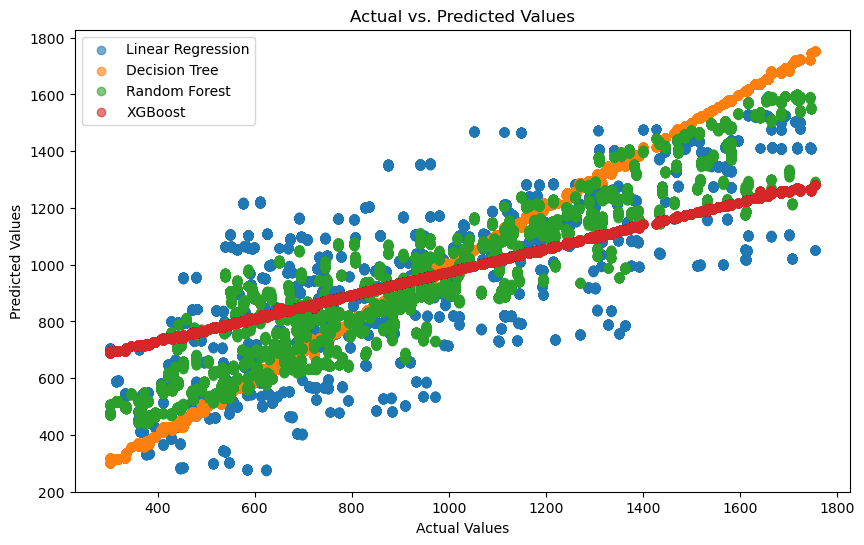

In [356]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test1, y_pred_linear_tuned, label='Linear Regression', alpha=0.6)

# Lasso Regression
#plt.scatter(y_test1, y_pred_lasso_tuned, label='Lasso Regression', alpha=0.6)

# Ridge Regression
#plt.scatter(y_test1, y_pred_ridge_tuned, label='Ridge Regression', alpha=0.6)

# ElasticNet
#plt.scatter(y_test1, y_pred_elastic_tuned, label='ElasticNet', alpha=0.6)

# Decision Tree Regressor
plt.scatter(y_test1, y_pred_dt_tuned, label='Decision Tree', alpha=0.6)

# Random Forest Regressor
plt.scatter(y_test1, y_pred_rf_tuned, label='Random Forest', alpha=0.6)

# XGBoost Regressor
plt.scatter(y_test1, y_pred_xgb_tuned, label='XGBoost', alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

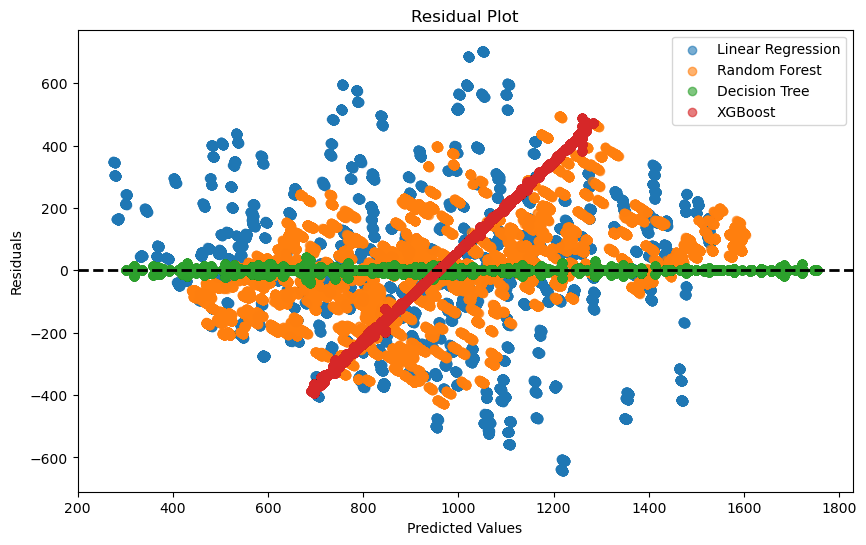

In [358]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals
residuals_lr = y_test1 - y_pred_linear_tuned
plt.scatter(y_pred_linear_tuned, residuals_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor Residuals
residuals_rf = y_test1 - y_pred_rf_tuned
plt.scatter(y_pred_rf_tuned, residuals_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor Residuals
residuals_dt = y_test1 -y_pred_dt_tuned
plt.scatter(y_pred_dt_tuned, residuals_dt, label='Decision Tree', alpha=0.6)

# XGBoost Regressor Residuals
residuals_xgb = y_test1 -y_pred_xgb_tuned
plt.scatter(y_pred_xgb_tuned, residuals_xgb, label='XGBoost', alpha=0.6)

plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

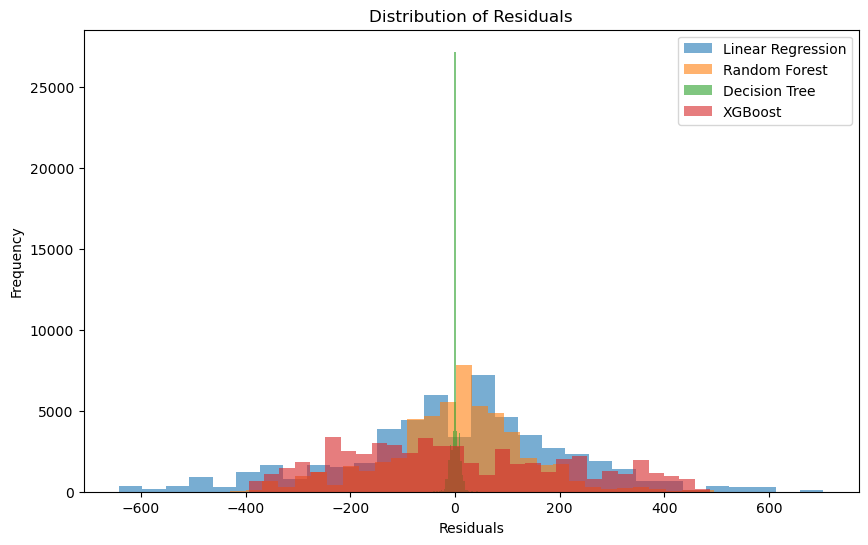

In [360]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals Distribution
plt.hist(residuals_lr, bins=30, alpha=0.6, label='Linear Regression')

# Random Forest Regressor Residuals Distribution
plt.hist(residuals_rf, bins=30, alpha=0.6, label='Random Forest')

# Decision Tree Regressor Residuals Distribution
plt.hist(residuals_dt, bins=30, alpha=0.6, label='Decision Tree')

# XGBoost Regressor Residuals Distribution
plt.hist(residuals_xgb, bins=30, alpha=0.6, label='XGBoost')

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()

In [362]:
# Feature selection using #Multicollinearity and vif score
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [364]:
final_df= flights_filtered.drop(columns=['flight_speed','time','month','year','distance'],axis=1)

In [366]:
# Select only numeric columns
numeric_df = final_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix using only numeric columns
correlation_matrix = numeric_df.corr()
k = 27  # Replace with the desired number of top features
selected_features = correlation_matrix['price'].abs().sort_values(ascending=False).index[1:k+1]

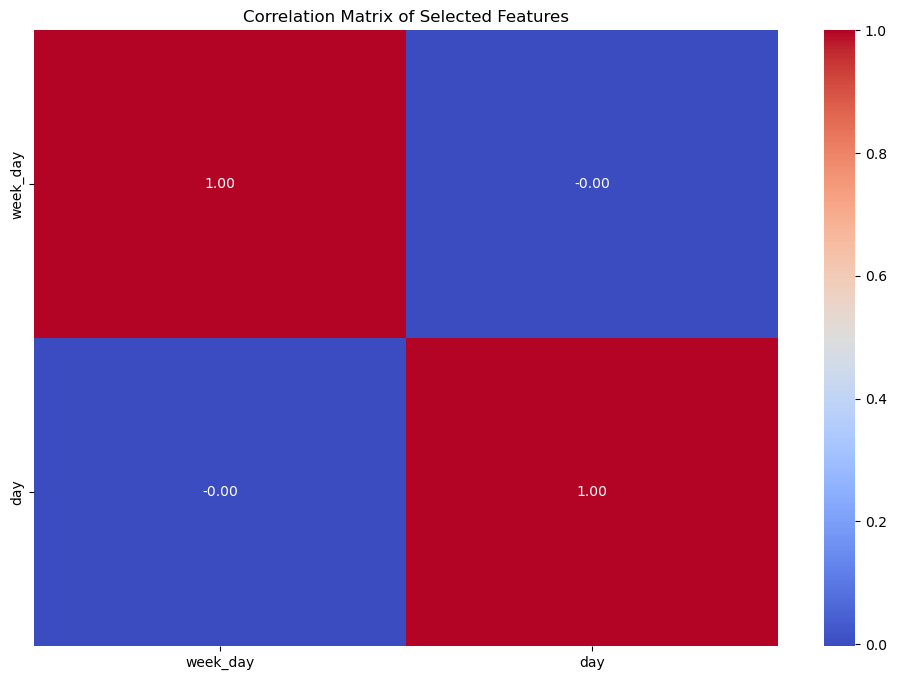

In [368]:
# Create a subset of the DataFrame with the selected features
subset_df = final_df[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = subset_df.corr()

# Set up the plot figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Matrix of Selected Features')

# Show the plot
plt.show()

In [370]:
calc_vif(flights_filtered[[i for i in flights_filtered.describe().columns if i  in selected_features]])

,variables,VIF
0,week_day,2.584125
1,day,2.584125


Flask Building
Things we need to do:

Flask Web Application: We create a Flask web application to serve as an API endpoint.

Load Trained Model: We load a trained regression model (you should replace this with your actual model loading code).

Prediction Function: We define a function (predict_value) to make predictions using the loaded model.

User Input Processing: In the /predict route, we collect user input data from an HTML form, including price, travel details, and other parameters.

Data Preparation: We prepare the user input data and convert it into a format suitable for making predictions.

Prediction: Using the loaded model, we make predictions based on the user's input.

JSON Response: We return the prediction result as a JSON response to the API request.

HTML Form: If the request is a GET request, we display an HTML form to collect user input.

Styling: You can customize the HTML form and add CSS styling to make it visually appealing.

Run the Flask App: The Flask app is run, allowing users to access it and receive predictions through API requests.

In [372]:
import pickle
pickle.dump(scaler_new,open('/content/drive/MyDrive/travel_capstone/scaling.pkl','wb'))
pickle.dump(best_rf_model,open('/content/drive/MyDrive/travel_capstone/rf_model.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/travel_capstone/scaling.pkl'